### Set up the working directory and load the libraries

In [1]:
# Set working directory to the github folder:
setwd("G:\\My Drive\\SDM_China")
# Load the libraries:
library(rgdal)
library(raster)
library(RColorBrewer)
library(maptools)
require(XML)
library(classInt)

Warning message:
"package 'rgdal' was built under R version 3.4.4"Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.4.4"rgdal: version: 1.3-6, (SVN revision 773)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.2.3, released 2017/11/20
 Path to GDAL shared files: D:/Programs/R/R-3.4.1/library/rgdal/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: D:/Programs/R/R-3.4.1/library/rgdal/proj
 Linking to sp version: 1.3-1 
Warning message:
"package 'raster' was built under R version 3.4.4"Warning message:
"package 'maptools' was built under R version 3.4.4"Checking rgeos availability: TRUE
Loading required package: XML
Warning message:
"package 'XML' was built under R version 3.4.4"Warning message:
"package 'classInt' was built under R version 3.4.4"

In [2]:
nn=0

In [3]:
#### Load data useful for visualisation:
borders <- readOGR(dsn = "raw_data\\ne_10m_admin_0_countries", layer = "ne_10m_admin_0_countries")
continents <- readOGR(dsn = "raw_data\\continent_shapefile", layer = "continent")

OGR data source with driver: ESRI Shapefile 
Source: "G:\My Drive\SDM_China\raw_data\ne_10m_admin_0_countries", layer: "ne_10m_admin_0_countries"
with 255 features
It has 94 fields
Integer64 fields read as strings:  POP_EST NE_ID 
OGR data source with driver: ESRI Shapefile 
Source: "G:\My Drive\SDM_China\raw_data\continent_shapefile", layer: "continent"
with 8 features
It has 1 fields


### Attempt at merging dtm:

In [ ]:
### Website:

dir.create("G:\\My Drive\\GIS_data")
setwd("G:\\My Drive\\GIS_data")

doc <- htmlParse("http://viewfinderpanoramas.org/Coverage%20map%20viewfinderpanoramas_org3.htm")
urls<-as.character(xpathSApply(doc, "//map/area/@href"))
names <-gsub("http://viewfinderpanoramas.org","",urls)
names <-gsub(".zip","",names)
names <-gsub("/","",names)

for (i in 1:length(urls)){download.file(urls[i],paste(getwd(),"//",names[i],".zip",sep=""))}
sapply(list.files(pattern = "*.zip"), unzip)
unlink(list.files(pattern = "*.zip"))

# Try to merge raster:

rasterlist<- list.files(path = getwd(),pattern = ".hgt$",full.names = T)
tiles <- lapply(rasterlist,FUN=stack)
merged_raster <- do.call(merge,tiles)

U33-U47

In [ ]:
# Get merged maps step by step:

#B43-B52

#E43-E51
#F43-F51
#G42-F52




rasterlist<- list.files(path = getwd(),pattern = ".hgt$",full.names = T)

expression <- ""

for (i in 43:52){expression<-paste(expression,"B",i,"|",sep="")}

for (i in 43:51){expression<-paste(expression,"E",i,"|",sep="")}
for (i in 43:51){expression<-paste(expression,"F",i,"|",sep="")}
for (i in 42:52){expression<-paste(expression,"G",i,"|",sep="")}
for (i in 42:52){expression<-paste(expression,"H",i,"|",sep="")}
for (i in 42:52){expression<-paste(expression,"I",i,"|",sep="")}
for (i in 42:52){expression<-paste(expression,"J",i,"|",sep="")}
for (i in 42:52){expression<-paste(expression,"K",i,"|",sep="")}
for (i in 42:52){expression<-paste(expression,"L",i,"|",sep="")}
for (i in 42:52){expression<-paste(expression,"M",i,"|",sep="")}
for (i in 42:52){expression<-paste(expression,"N",i,"|",sep="")}
for (i in 42:52){expression<-paste(expression,"O",i,"|",sep="")}




expression<-substr(expression,1,nchar(expression)-1)

smalllist<-subset(rasterlist, grepl(expression, rasterlist))

tiles <- lapply(smalllist,FUN=stack)
merged_raster <- do.call(merge,tiles)


In [4]:
rasterlist<- list.files(path = getwd(),pattern = ".hgt$",full.names = T,recursive=TRUE)


In [6]:
getwd()

[1] "G:/My Drive/SDM_China"

### Nice terrain basemap:

In [2]:
# Get a nice basemap from: https://www.naturalearthdata.com/downloads/
basemap <- brick("raw_data\\NE2_50m_SR_W\\NE2_50M_SR_W\\NE2_50M_SR_W.tif")

In [3]:
### Prepare a DEM for visualisation of the terrain in the background maps:
elevation<-raster("raw_data\\china_elevation\\CHN_alt.gri")
# Creat hillshade for visualisations
slope <- terrain(elevation, opt='slope')
aspect <- terrain(elevation, opt='aspect')
# create hillshade
# numbers 
elevation.hill <- hillShade(slope, aspect, 
                      angle=20, 
                      direction=270)
# Create a nice color pallette:

pal <- brewer.pal(11, "Spectral")
pal<-c("white","white","white","white","white","white",pal[1:7],pal[8],"#3B5C2F")
pal <- colorRampPalette(pal)

##Experiment with the palettes:
#pal<-c("white","white","#F7CB84","#C1AA9B","#E5DAA8","#DDD7A3","#D6AC84","#9BB576","#C2CA91","#68964B","#3B5C2D")
#pal <- colorRampPalette(pal)

# Define extent for plottting:
#ext <- c(73.65569,134.7672,18.16889,53.52666 )
ext <- c(65,140,15,57 )


# Load the boarders data
borders <- readOGR(dsn = "raw_data\\countries_borders", layer = "cntry_3m")
# Transform the borders coordinate system to fit the raste
borders <- spTransform(borders, crs(elevation))
# Crop borders to the extent in
borders <- crop(borders, ext)

### Add the map with rivers
rivers <- readOGR(dsn = "raw_data\\majorrivers_0_0", layer = "MajorRivers")
rivers <- crop(rivers, ext)

OGR data source with driver: ESRI Shapefile 
Source: "G:\My Drive\SDM_China\raw_data\countries_borders", layer: "cntry_3m"
with 4077 features
It has 9 fields
Integer64 fields read as strings:  CTRY3M_ CTRY3M_ID 


Loading required namespace: rgeos


OGR data source with driver: ESRI Shapefile 
Source: "G:\My Drive\SDM_China\raw_data\majorrivers_0_0", layer: "MajorRivers"
with 98 features
It has 4 fields


### Load data with fagopyrum presence in South East Asia

In [2]:
### Fagopyrum locations for China:
#Import the table for Fagopyrum occurance records, based on (Hunt et al., 2017) and further evidence from the literature
loc_ea <- read.csv("raw_data//fagopyrum_east_asia.csv")
#Inspect the table
head(loc_ea)
str(loc_ea)
#Transform the table into a spatial points dataframe

No. Sample_type     Quantity Sediment_type_pollen_cores          
1 1   Pollen sequence NA       Loess-palaeosol                     
2 2   Pollen sequence NA       Loess-palaeosol                     
3 3   Pollen sequence NA       Alluvial sediment                   
4 4   Pollen sequence NA       Loess-palaeosol with cultural layers
5 5   Pollen sequence NA       Alluvial sediment                   
6 6   Pollen sequence NA       Loess-palaeosol                     
  Site_section_name                             Site_short             
1 Xindian section                               Xindian                
2 Beizhuangcun section                          Beizhuangcun           
3 WangXianggou site                             WangXianggou           
4 Xishanping site                               Xishanping             
5 CM97(Chongming island)/ Changjiang River_1997 CM97 (Chongming island)
6 Jingbian section                              Jingbian               
  Province       Country Taxonomic_identification Dating_method           
1 Shaanxi        China   Fagopyrum. sp            AMS 14C and OSL         
2 Shaanxi        China   Fagopyrum. sp            Stratigraphic comparison
3 Inner Mongolia China   Fagopyrum. sp            AMS 14C                 
4 Gansu          China   Fagopyrum. sp            AMS 14C                 
5 Shanghai       China   Fagopyrum. sp            AMS 14C                 
6 Shaanxi        China   Fagopyrum. sp            Stratigraphic comparison
  Dating_result    Reference                               longitude latitude
1 from 5500 cal BP Li et al. 2009                          107.80    34.30   
2 from 5000 cal BP Shang and Li 2010                       109.53    34.30   
3 from 4700 cal BP Li et al. 2006                          119.92    42.07   
4 from 4600 cal BP Li et al. 2007, Cao et al 2019          105.54    34.56   
5 4500 cal BP      Yi et al. 2003b; Cao et al. 2013        121.38    31.62   
6 4000 cal BP      Cheng and Jiang 2011; Jiang et al. 2013 108.90    37.50   
  lon          lat         altitude..masl. location_source   start_date
1 107°48'E     34°23'N      608.00         Li et al. 2009    5500      
2 109°32'E     34°21'N      519.00         Shang and Li 2010 5000      
3 119°55'E     42°04'N      751.00         Li et al. 2006    4700      
4 105°32'41''E 34°33'50''N 1330.00         Li et al. 2007    4600      
5 121°23'E     31°37'N        2.48         Yi et al. 2003b   4500      
6 108.9°E      37.5°N      1688.00         Jiang et al. 2013 4000      
  end_date
1    0    
2    0    
3    0    
4    0    
5 4500    
6 4000

'data.frame':	40 obs. of  20 variables:
 $ No.                       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Sample_type               : Factor w/ 3 levels "Charred seeds",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Quantity                  : int  NA NA NA NA NA NA NA NA NA NA ...
 $ Sediment_type_pollen_cores: Factor w/ 10 levels "","0","Alluvial sediment",..: 6 6 3 7 3 6 6 3 5 3 ...
 $ Site_section_name         : Factor w/ 37 levels "Bayantala site",..: 33 2 31 34 7 17 10 3 32 12 ...
 $ Site_short                : Factor w/ 37 levels "Bayantala","Beizhuangcun",..: 33 2 31 34 7 17 10 3 32 12 ...
 $ Province                  : Factor w/ 17 levels "","Beijing","Dongbei pingyuan",..: 11 11 6 4 13 11 11 7 17 12 ...
 $ Country                   : Factor w/ 3 levels "China","India",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Taxonomic_identification  : Factor w/ 8 levels "Buckwheat ","Buckwheat (qiaomai)",..: 7 7 7 7 7 7 7 7 8 7 ...
 $ Dating_method             : Factor w/ 7 levels "","AMS 14C","AMS 14C and OSL",..: 3 7

In [3]:
coordinates(loc_ea)<-~longitude+latitude
#proj4string(loc_ea) <- CRS("+proj=longlat +ellps=WGS84 +towgs84=0,0,0,0,0,0,0 +no_defs")

In [4]:
library(rgdal)
origin <-readOGR(dsn = "raw_data\\origin", layer = "origin_all")
origin$id <-c("sanjiang","esculentum","tatricum")
head(origin)

OGR data source with driver: ESRI Shapefile 
Source: "G:\My Drive\SDM_China\raw_data\origin", layer: "origin_all"
with 3 features
It has 2 fields
Integer64 fields read as strings:  id 


id         feature
0 sanjiang   org    
1 esculentum esc    
2 tatricum   tat

In [5]:
origin$id <-c("sanjiang","esculentum","tataricum")

In [6]:
head(origin$id)

[1] "sanjiang"   "esculentum" "tataricum"

In [7]:
head(d)

ERROR: Error in head(d): object 'd' not found


In [108]:
loc_ea$Sample_type

[1] Pollen sequence Pollen sequence Pollen sequence Pollen sequence
 [5] Pollen sequence Pollen sequence Pollen sequence Pollen sequence
 [9] Pollen sequence Pollen sequence Pollen sequence Pollen sequence
[13] Pollen sequence Pollen sequence Starch grains   Starch grains  
[17] Charred seeds   Charred seeds   Charred seeds   Charred seeds  
[21] Charred seeds   Charred seeds   Charred seeds   Charred seeds  
[25] Charred seeds   Charred seeds   Charred seeds   Charred seeds  
[29] Pollen sequence Pollen sequence Pollen sequence Pollen sequence
[33] Pollen sequence Pollen sequence Pollen sequence Pollen sequence
[37] Charred seeds   Charred seeds   Charred seeds   Charred seeds  
Levels: Charred seeds Pollen sequence Starch grains

In [109]:
head(loc_ea["Sample_type"=="Pollen_sequence"])

1
2
3
4
5
6

In [110]:
d['Sample_type'=="Charred seed"]

       coordinates
1    (107.8, 34.3)
2   (109.53, 34.3)
3  (119.92, 42.07)
4  (105.54, 34.56)
5  (121.38, 31.62)
29 (35.78, 108.29)
30 (120.23, 32.25)
32 (109.42, 35.75)
34   (114.4, 36.1)
35  (126.6, 42.28)

In [114]:
unique(loc_ea$Sample_type)


[1] Pollen sequence Starch grains   Charred seeds  
Levels: Charred seeds Pollen sequence Starch grains

In [162]:
d<-subset(loc_ea,loc_ea$start_date>=4000)
d[as.character(d$Sample_type)=="Starch grains",]

       coordinates No.   Sample_type Quantity Sediment_type_pollen_cores
15 (103.86, 34.69)  15 Starch grains       NA                          0
16  (101.73, 36.8)  16 Starch grains       NA                          0
   Site_section_name   Site_short Province Country Taxonomic_identification
15 Chenqi mogou site Chenqi mogou    Gansu   China     Fagopyrum esculentum
16    Changning site    Changning  Qinghai   China      Buckwheat (qiaomai)
            Dating_method Dating_result      Reference    lon   lat
15 Archaeological culture   4000 cal BP Li et al. 2010 103.86 34.69
16 Archaeological culture   4000 cal BP      Qiao 2014 101.73  36.8
   altitude..masl. location_source start_date end_date
15            2000   Li et al 2017       4000     4000
16              NA Dong et al 2012       4000     4000

In [235]:
loc_ea

            coordinates No.     Sample_type Quantity
1         (107.8, 34.3)   1 Pollen sequence       NA
2        (109.53, 34.3)   2 Pollen sequence       NA
3       (119.92, 42.07)   3 Pollen sequence       NA
4       (105.54, 34.56)   4 Pollen sequence       NA
5       (121.38, 31.62)   5 Pollen sequence       NA
6         (108.9, 37.5)   6 Pollen sequence       NA
7         (109.3, 36.2)   7 Pollen sequence       NA
8       (118.98, 31.32)   8 Pollen sequence       NA
9       (100.17, 26.98)   9 Pollen sequence       NA
10       (118.9, 37.82)  10 Pollen sequence       NA
11      (126.37, 42.33)  11 Pollen sequence       NA
12      (123.46, 43.15)  12 Pollen sequence       NA
13       (112.23, 38.9)  13 Pollen sequence       NA
14      (109.83, 40.65)  14 Pollen sequence       NA
15      (103.86, 34.69)  15   Starch grains       NA
16       (101.73, 36.8)  16   Starch grains       NA
17      (115.99, 39.72)  17   Charred seeds       NA
18       (99.92, 26.43)  18   Charred seeds   

In [237]:
ext <- c(65,140,15,57 )
tiff("images\\4000_2000.tiff", units="in", width=12, height=6.72, res=1200)
d<-subset(loc_ea,loc_ea$start_date>=000)
plotRGB(basemap, interpolate = TRUE,ext=ext,mar=rep(0,4),bg=rgb(255,255,255,alpha=1))
plot(rivers, add=TRUE, col="dodgerblue",lwd=1)
plot(borders, add=TRUE, border="grey50", lwd=1)
#points(d)
plot(subset(origin, origin$id=="tataricum"), add=TRUE,  col=rgb(1, 0.5, 0,0.5), border=NA)
text(75,25 , "F. tataricum, subsp. pottani", pos = 4, cex=0.8,col="darkorange4")
plot(subset(origin, origin$id=="esculentum"), add=TRUE,  col=rgb(1, 1, 0,0.5), border=NA)
text(95,23 , "F. esculentum \n subsp. ancestralis", pos = 4, cex=0.8,col="darkorange4")
plot(subset(origin, origin$id=="sanjiang"), add=TRUE,  col=rgb(1, 0, 0,0.5), border=NA)
text(95,28 , "Sanjiang", pos = 4, cex=0.8,col="black")
points(d[as.character(d$Sample_type)=="Pollen sequence",],pch=21, bg="pink",col="red",lwd=3)
points(d[as.character(d$Sample_type)=="Charred seeds",],pch=17, bg="black",col="black",lwd=3)
text(d[as.character(d$Sample_type)=="Charred seeds",],labels=d[as.character(d$Sample_type)=="Charred seeds",]$Site_short, 
    cex= 1,pos=c(3,2,4,4,1,4,4,4,4,2,4,3))
points(d[as.character(d$Sample_type)=="Starch grains",],pch=22, bg="orange",col="brown",lwd=3)
text(d[as.character(d$Sample_type)=="Starch grains",],labels=d[as.character(d$Sample_type)=="Starch grains",]$Site_short, 
    cex= 1,pos=c(2,2))

text(65,55 , "post-2000 cal Years BP", pos = 4, cex=2,col="black")
legend(x='bottomright', legend = c("Pollen", "Charred seeds","Starch grains"), inset=c(0.01,0.01), cex=1.5,
       pch=c(21,24,22), col=c("red","black","brown"), pt.bg=c("pink","black","orange"))
#points(loc_ea['Sample_type'=="Charred seed"],pch=17,lwd=3)

dev.off()

png 
  2

In [10]:

# Create a nice color pallette:

pal <- brewer.pal(11, "Spectral")
pal<-c("white","white","white","white","white","white",pal[1:7],pal[8],"#3B5C2F")
pal <- colorRampPalette(pal)

##Experiment with the palettes:
#pal<-c("white","white","#F7CB84","#C1AA9B","#E5DAA8","#DDD7A3","#D6AC84","#9BB576","#C2CA91","#68964B","#3B5C2D")
#pal <- colorRampPalette(pal)

# Define extent for plottting:
#ext <- c(73.65569,134.7672,18.16889,53.52666 )
ext <- c(70,110,10,40)


# Load the boarders data
borders <- readOGR(dsn = "raw_data\\countries_borders", layer = "cntry_3m")
# Transform the borders coordinate system to fit the raste
borders <- spTransform(borders, crs(elevation))
# Crop borders to the extent in
borders <- crop(borders, ext)

### Add the map with rivers
rivers <- readOGR(dsn = "raw_data\\majorrivers_0_0", layer = "MajorRivers")
rivers <- crop(rivers, ext)

OGR data source with driver: ESRI Shapefile 
Source: "G:\My Drive\SDM_China\raw_data\countries_borders", layer: "cntry_3m"
with 4077 features
It has 9 fields
Integer64 fields read as strings:  CTRY3M_ CTRY3M_ID 
OGR data source with driver: ESRI Shapefile 
Source: "G:\My Drive\SDM_China\raw_data\majorrivers_0_0", layer: "MajorRivers"
with 98 features
It has 4 fields


In [23]:
# Load the boarders data
meghalaya <- readOGR(dsn = "raw_data\\IND_adm", layer = "IND_adm1")
# Transform the borders coordinate system to fit the raste
meghalays <- spTransform(borders, crs(elevation))

OGR data source with driver: ESRI Shapefile 
Source: "G:\My Drive\SDM_China\raw_data\IND_adm", layer: "IND_adm1"
with 36 features
It has 9 fields
Integer64 fields read as strings:  ID_0 ID_1 


In [32]:
m<- subset(meghalaya,meghalaya$NAME_1 == "Meghalaya")

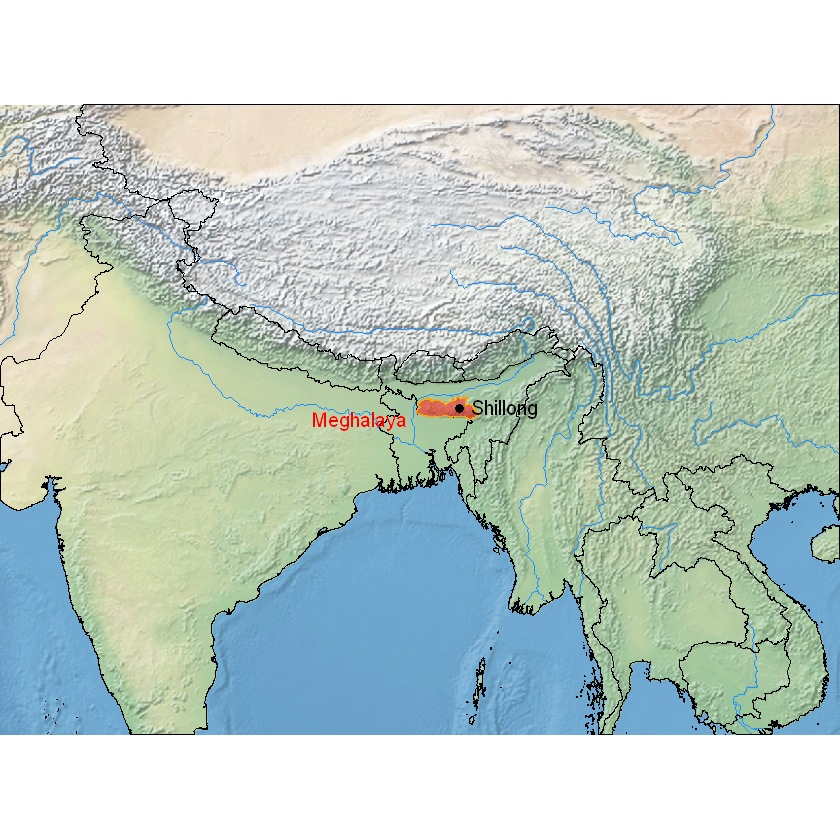

In [52]:
#### location of Meghalaya for buckwheat conference:


plotRGB(basemap, interpolate = TRUE,ext=ext,mar=rep(0,4),bg=rgb(255,255,255,alpha=1))
plot(rivers, add=TRUE, col="dodgerblue",lwd=1)
plot(borders, add=TRUE, border="black", lwd=1)
plot(m, add=TRUE, border="orange", col=rgb(1, 0, 0,0.5),lwd=1)
text(91.8833,25.5667, "Shillong", pos = 4, cex=1,col="black")
text(90,25, "Meghalaya", pos = 2, cex=1,col="red")
points(91.8833,25.5667, col="black", pch=21,bg="black", cex=1)

In [249]:
ext <- c(50,150,15,75 )

borders <- readOGR(dsn = "raw_data\\ne_10m_admin_0_countries", layer = "ne_10m_admin_0_countries")
# Transform the borders coordinate system to fit the raste
borders <- spTransform(borders, crs(elevation))
# Crop borders to the extent in
borders <- crop(borders, ext)

rivers <- readOGR(dsn = "raw_data\\majorrivers_0_0", layer = "MajorRivers")
rivers <- crop(rivers, ext)

OGR data source with driver: ESRI Shapefile 
Source: "G:\My Drive\SDM_China\raw_data\ne_10m_admin_0_countries", layer: "ne_10m_admin_0_countries"
with 255 features
It has 94 fields
Integer64 fields read as strings:  POP_EST NE_ID 
OGR data source with driver: ESRI Shapefile 
Source: "G:\My Drive\SDM_China\raw_data\majorrivers_0_0", layer: "MajorRivers"
with 98 features
It has 4 fields


In [263]:
### Base for the visualisation of dispersal
tiff("images\\4000_2000.tiff", units="in", width=12, height=6.72, res=1200)
ext <- c(50,150,15,71 )
#tiff("images\\4000_2000.tiff", units="in", width=12, height=6.72, res=1200)
plotRGB(basemap, interpolate = TRUE,ext=ext,mar=rep(0,4),bg=rgb(255,255,255,alpha=1))
plot(rivers, add=TRUE, col="dodgerblue",lwd=1)
plot(borders, add=TRUE, border="grey50", lwd=1)

plot(subset(origin, origin$id=="tataricum"), add=TRUE,  col=rgb(1, 0.5, 0,0.5), border=NA)
text(75,25 , "F. tataricum, subsp. pottani", pos = 4, cex=0.8,col="darkorange4")
plot(subset(origin, origin$id=="esculentum"), add=TRUE,  col=rgb(1, 1, 0,0.5), border=NA)
text(95,23 , "F. esculentum \n subsp. ancestralis", pos = 4, cex=0.8,col="darkorange4")
plot(subset(origin, origin$id=="sanjiang"), add=TRUE,  col=rgb(1, 0, 0,0.5), border=NA)
text(95,28 , "Sanjiang", pos = 4, cex=0.8,col="black")

dev.off()

png 
  2

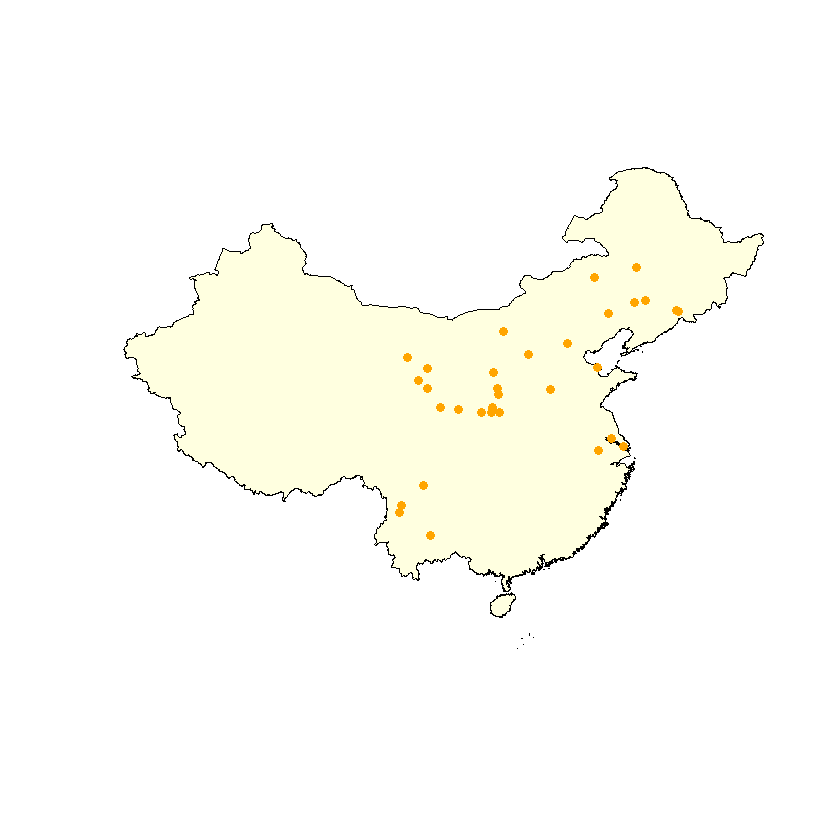

In [296]:
plot(borders[borders$SOVEREIGNT=="China",],col="lightyellow")
d<-subset(loc_ea,loc_ea$Country=="China" &loc_ea$Site_short!="Kyung-lung Mesa")
points(d,bg="yellow",col="orange",pch=16)

In [9]:
pr5<-raster("D:\\buckbee\\data\\results\\maxent\\predictions\\4.tif")


In [12]:
pal <- colorRampPalette(c("lightyellow","yellow","gold","orange","orange2","red","darkred","brown","brown4"))
extent <- c(73.65569,134.7672,18.16889,53.52666 )

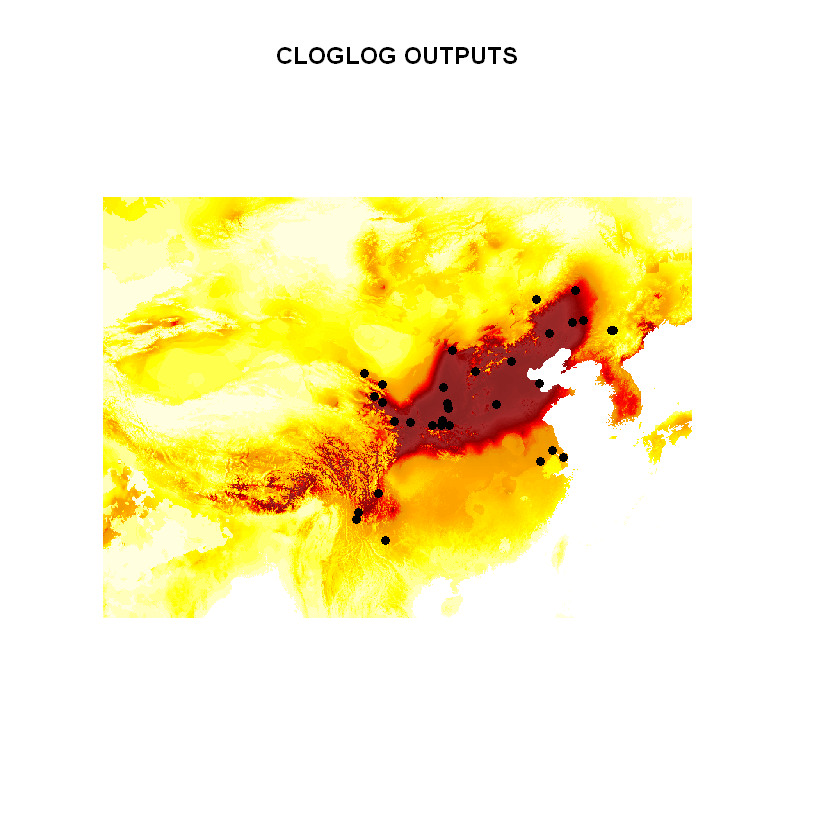

In [15]:

plot(pr5, col = pal(50),axes=FALSE, box=FALSE,legend=FALSE,ext=extent, main="CLOGLOG OUTPUTS")
d<-subset(loc_ea,loc_ea$Country=="China" &loc_ea$Site_short!="Kyung-lung Mesa")

points(d,pch=16)

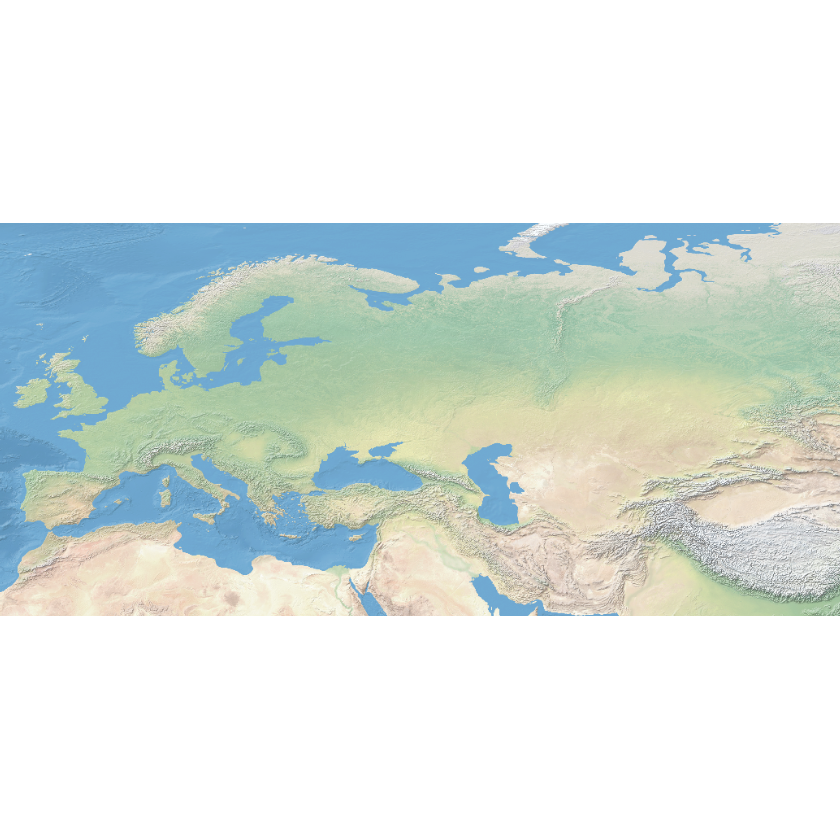

In [276]:
#Set up a base for the visualisation of Europe:
#tiff("images\\europe.tiff", units="in", width=12, height=6.72, res=1200)

ext <- c(-12,95,25,75 )
plotRGB(basemap, interpolate = TRUE,ext=ext,mar=rep(0,4),bg=rgb(255,255,255,alpha=1))

## Set up a base map for future data visualisations:

In [ ]:
plotRGB(basemap, interpolate = TRUE,ext=ext)

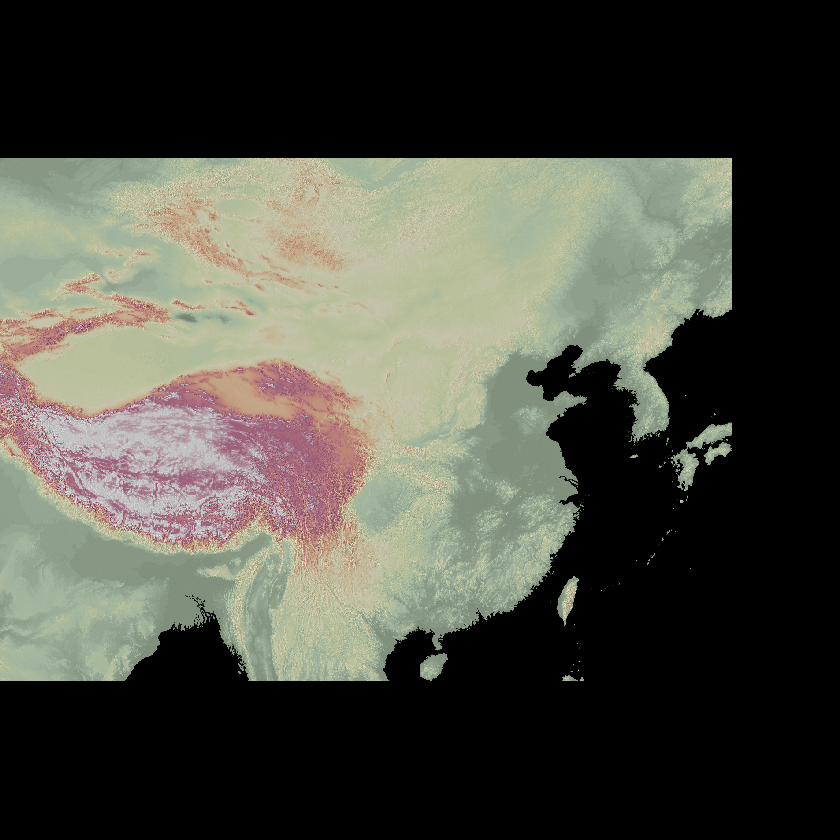

In [11]:
#tiff("images\\base_map.tiff", units="in", width=12, height=12, res=600)

ext <- c(73.65569,134.7672,18.16889,53.52666 )

par(bg = 'black',mar=c(0,0,0,0))
plot(elevation.hill,ext=ext, col=grey(1:100/100),axes=FALSE, box=FALSE,legend=FALSE,alpha=1)
plot(elevation,ext=ext, col=rev(pal(100)),axes=FALSE, box=FALSE,legend=FALSE,alpha=0.4,add=TRUE)
#plot(rivers, add=TRUE, col="skyblue3",lwd=0.1)
#plot(borders, add=TRUE, border="grey42", lwd=0.01)
##axis(side=4, at=c(20,40), col="grey",las=2,lwd = 0, lwd.ticks = 1)
#axis(side=1, at=c(80,100,120), col="grey",las=0,lwd = 0, lwd.ticks = 1)

#dev.off()

In [80]:
subset(loc_ea,loc_ea$start_data>4000)

 [1] coordinates                No.                       
 [3] Sample_type                Quantity                  
 [5] Sediment_type_pollen_cores Site_section_name         
 [7] Site_short                 Province                  
 [9] Country                    Taxonomic_identification  
[11] Dating_method              Dating_result             
[13] Reference                  lon                       
[15] lat                        altitude..masl.           
[17] location_source            start_date                
[19] end_date                  
<0 rows> (or 0-length row.names)

In [84]:
loc_ea$start_data

NULL

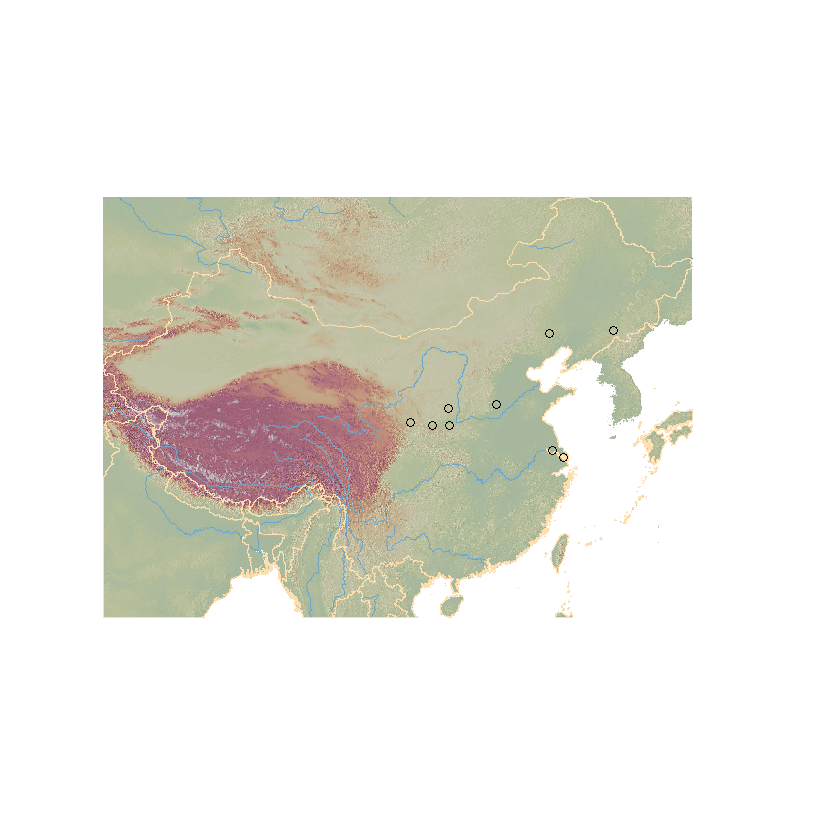

In [85]:
d<-subset(loc_ea,loc_ea$start_date>4000)
ext <- c(73.65569,134.7672,18.16889,53.52666 )
plot(elevation.hill,ext=extent, col=grey(1:100/100),axes=FALSE, box=FALSE,legend=FALSE,alpha=1)
plot(elevation,ext=ext, col=rev(pal(100)),axes=FALSE, box=FALSE,legend=FALSE,alpha=0.4,add=TRUE)
plot(rivers, add=TRUE, col="skyblue3",lwd=0.01)
plot(borders, add=TRUE, border="navajowhite", lwd=0.01)
points(d)

In [74]:
loc_ea

            coordinates No.     Sample_type Quantity
1         (107.8, 34.3)   1 Pollen sequence       NA
2        (109.53, 34.3)   2 Pollen sequence       NA
3       (119.92, 42.07)   3 Pollen sequence       NA
4       (105.54, 34.56)   4 Pollen sequence       NA
5       (121.38, 31.62)   5 Pollen sequence       NA
6         (108.9, 37.5)   6 Pollen sequence       NA
7         (109.3, 36.2)   7 Pollen sequence       NA
8       (118.98, 31.32)   8 Pollen sequence       NA
9       (100.17, 26.98)   9 Pollen sequence       NA
10       (118.9, 37.82)  10 Pollen sequence       NA
11      (126.37, 42.33)  11 Pollen sequence       NA
12      (123.46, 43.15)  12 Pollen sequence       NA
13       (112.23, 38.9)  13 Pollen sequence       NA
14      (109.83, 40.65)  14 Pollen sequence       NA
15      (103.86, 34.69)  15   Starch grains       NA
16       (101.73, 36.8)  16   Starch grains       NA
17      (115.99, 39.72)  17   Charred seeds       NA
18       (99.92, 26.43)  18   Charred seeds   

In [ ]:
## Turn fagopyrum locations into a spatial points dataframe:


In [75]:
### Import additional pollen data from pollen database for Asia provided by Xianyong Cao, used in the paper (Cao et al., 2019):
asia_pollen<-read.csv("raw_data//FossilPollenDatabasePercentageAsian.csv")
# Inspect the record
head(asia_pollen)
#Create a subset of records where fagopyrum has been identified:
af_pollen <- subset(asia_pollen, asia_pollen$Fagopyrum>0)
#Insepct the subset
str(af_pollen)
# Get the number of sites with Fagopyrum pollen and their names:
length(unique(af_pollen$Site))
unique(af_pollen$Site)

ID Country  Province Site           Latitude Longitude Altitude Cal.yr.BP
1 1  Mongolia NA       Achit Nur Lake 49.5     90.6      1435      353.2   
2 1  Mongolia NA       Achit Nur Lake 49.5     90.6      1435     1239.3   
3 1  Mongolia NA       Achit Nur Lake 49.5     90.6      1435     2763.2   
4 1  Mongolia NA       Achit Nur Lake 49.5     90.6      1435     2803.5   
5 1  Mongolia NA       Achit Nur Lake 49.5     90.6      1435     3207.5   
6 1  Mongolia NA       Achit Nur Lake 49.5     90.6      1435     3541.4   
  Fagopyrum Polygonum Polygonaceae..other.
1 0         0         0                   
2 0         0         0                   
3 0         0         0                   
4 0         0         0                   
5 0         0         0                   
6 0         0         0

'data.frame':	97 obs. of  11 variables:
 $ ID                  : int  29 29 29 29 29 29 29 29 29 29 ...
 $ Country             : Factor w/ 6 levels "China","India",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Province            : Factor w/ 32 levels "","Anhui","Beijing",..: 15 15 15 15 15 15 15 15 15 15 ...
 $ Site                : Factor w/ 471 levels "11-CH-12A Lake",..: 59 59 59 59 59 59 59 59 59 59 ...
 $ Latitude            : num  31.6 31.6 31.6 31.6 31.6 ...
 $ Longitude           : num  121 121 121 121 121 ...
 $ Altitude            : num  2 2 2 2 2 2 2 2 2 2 ...
 $ Cal.yr.BP           : num  357 557 722 879 1000 ...
 $ Fagopyrum           : num  3.57 1.47 7.81 2.86 1.64 ...
 $ Polygonum           : num  0 0 0 0 0 0 1.49 0 4.35 7.5 ...
 $ Polygonaceae..other.: num  0 0 0 0 0 0 0 0 0 0 ...


[1] 9

[1] Changjiang River_1997 Changjiang River_1998 Charisu              
[4] Luochuan              Shayema Lake          Wangjiadian          
[7] Wangyanggou           Sihailongwan Lake     Tso Moriri Lake      
471 Levels: 11-CH-12A Lake Achit Nur Lake Achit Nuur Adycha River ... Zoige_RM

In [73]:
subset(af_pollen,af_pollen$Site=="Tso Moriri Lake")

ID  Country Province Site            Latitude Longitude Altitude
21207 465 India   NA       Tso Moriri Lake 32.93    78.32     4512    
      Cal.yr.BP Fagopyrum Polygonum Polygonaceae..other.
21207 1076      0.21      2.14      0.85

In [ ]:
# Make pollen diagrams for these sites:
# To do later, not needed for the map:

In [ ]:
## Merge the datasets to make a map:


In [46]:
# Import additional data for northern China & Syberia provided alongside the paper (Cao et al., 2019).
row_names <- ""
cao2019 <-read.table("raw_data\\CaoX-etal_2019\\datasets\\Siberia_pollen_percentages.tab", header = TRUE, sep = "\t", row.names=NULL,skip=303)


Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
"EOF within quoted string"Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
"number of items read is not a multiple of the number of columns"

In [55]:
a<-subset(cao2019,cao2019$Polygonacea>0)

In [56]:
unique(a$Event)

[1] Alut_Lake           Amba_River          Amguema_River_1    
 [4] Amguema_River_2     ARAL86              BAIDARA            
 [7] KOLYMA              PG1756              Byllatskoye        
[10] Chernaya_Gorka      Dolgoe_Ozero        KURO11             
[13] ELGENNYA            EK4                 ENMYN              
[16] MAMENM              ENM109              GEK                
[19] GLUPEAT             GOLUBOY             GYTGYKAI           
[22] Indigirka_Lowland   Kosmodemyanskaya-3  KUROP7             
[25] Lake_Lama           Laptev_PM9462       LEDOBOZ            
[28] Lesnoye_Lake        Lorino              LUKA               
[31] MALTAN              MOKHOVOE            NIZHNIVA           
[34] NULSAVEI            Okunayka            Ovrazhnyii_Stream-2
[37] PENZHIN             Pobochnoye          SAO1               
[40] Selitkan-1          Selitkan-2          Selitkan-3         
[43] Sergeevskii         Siluyanov_Yar       SMOR               
[46] STAD1               STAD                SUOLLAKH           
[49] SVERDRUP            TS                  TOM1               
[52] Elgygytgyn_Lake_P1  Elgygytgyn_Lake_P2 
114 Levels: Adycha_River Alut_Lake Amba_River ... TS

In [3]:
### Open the kmz rice database:
library(rgdal)
### This unzips the kmlfile and saves it in the database
#kmlfile <- unzip(zipfile = "raw_data\\journal.pone.0137024.s001.kmz",exdir   = "raw_data\\rice_database")
### This imports the rice database into R:
#rice<-readOGR(kmlfile[[1]])

Warning message:
"package 'rgdal' was built under R version 3.4.4"Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.4.4"rgdal: version: 1.3-6, (SVN revision 773)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.2.3, released 2017/11/20
 Path to GDAL shared files: D:/Programs/R/R-3.4.1/library/rgdal/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: D:/Programs/R/R-3.4.1/library/rgdal/proj
 Linking to sp version: 1.3-1 


In [4]:
hosner2016 <-read.table("raw_data\\Hosner_2016.tab", header = TRUE, sep = "\t", row.names=NULL,skip=20)

In [5]:
head(hosner2016)

Site    Volume Page.s. Type        Area             
1 P000001 Anhui  56-57   general map complete province
2 P000002 Anhui  56-57   general map complete province
3 P000003 Anhui  56-57   general map complete province
4 P000004 Anhui  56-57   general map complete province
5 P000005 Anhui  56-57   general map complete province
6 P000006 Anhui  56-57   general map complete province
  Cult.age                           Age.max..ka. Age.dated.min..ka.
1 undistinguished Neolithic cultures 8            4                 
2 undistinguished Neolithic cultures 8            4                 
3 undistinguished Neolithic cultures 8            4                 
4 undistinguished Neolithic cultures 8            4                 
5 undistinguished Neolithic cultures 8            4                 
6 undistinguished Neolithic cultures 8            4                 
  Age..ka.BP. Longitude Latitude
1 6           117.040   34.112  
2 6           117.111   34.058  
3 6           117.113   34.041  
4 6           117.139   34.050  
5 6           117.160   34.048  
6 6           117.616   33.750

In [6]:
unique(hosner2016$Volume)

[1] Anhui                             Beijing                          
 [3] Chongqing                         Fujian                           
 [5] Gansu                             Guangdong                        
 [7] Hebei                             Henan                            
 [9] Hubei                             Hunan                            
[11] Inner Mongolia Autonomous Region  Jiangsu                          
[13] Jilin                             Liaoning                         
[15] Ningxia Hui Autonomous Region     Qinghai                          
[17] Shaanxi                           Shandong                         
[19] Shanxi                            Sichuan                          
[21] Tianjin                           Tibet Autonomous Region          
[23] Xinjiang Uyghur Autonomous Region Yunnan                           
[25] Zhejiang                         
25 Levels: Anhui Beijing Chongqing Fujian Gansu Guangdong Hebei Henan ... Zhejiang

In [29]:
unique(hosner2016$Cult.age)
unique(hosner2016$Cult.age)[15]

[1] undistinguished Neolithic cultures                        
 [2] undistinguished Shang-Zhou dynasty period                 
 [3] undistinguished Xia-Shang-Zhou dynasty period             
 [4] Baizhuduan culture                                        
 [5] Fubin culture                                             
 [6] Fuguodun culture                                          
 [7] Huangguashan culture                                      
 [8] Huangtulun culture                                        
 [9] Hulushan culture                                          
[10] Keqiuto culture                                           
[11] Niubishan culture                                         
[12] undistinguished Bronze Age cultures                       
[13] Tanshishan culture                                        
[14] Dadiwan culture                                           
[15] Yangshao culture                                          
[16] Majiayao culture                                          
[17] Qijia culture                                             
[18] Shajing culture                                           
[19] Siba culture                                              
[20] Siwa culture                                              
[21] Xindian culture                                           
[22] undistinguished Shang-early Western Han dynasty period    
[23] undistinguished Xia-Shang-Western Zhou dynasty period     
[24] Eastern Zhou dynasty period                               
[25] Peiligang culture                                         
[26] Longshan culture                                          
[27] Dawenkou culture                                          
[28] Qujialing culture                                         
[29] Chengbeixi + Daxi cultures                                
[30] Chengbeixi culture                                        
[31] Daxi culture                                              
[32] Qujialing + Shijiahe cultures                             
[33] Shijiahe culture                                          
[34] Majiayao + Qijia cultures                                 
[35] Banshan phase                                             
[36] Machang phase                                             
[37] Majiayao phase                                            
[38] Shilingxia phase                                          
[39] Qijia-culture                                             
[40] Kayue culture                                             
[41] Nuomuhong culture                                         
[42] Laoguantai culture                                        
[43] early + middle Yangshao cultures                          
[44] early Yangshao culture                                    
[45] late Yangshao culture                                     
[46] middle Yangshao culture                                   
[47] late Neolithic                                            
[48] Shang dynasty period                                      
[49] Xia dynasty period                                        
[50] Western Zhou dynasty period                               
[51] Chunqiu period                                            
[52] Zhanguo period                                            
[53] Beixin culture                                            
[54] Houli culture                                             
[55] Yueshi culture                                            
[56] Zhou dynasty period                                       
[57] Miaodigou II culture                                      
[58] undistinguished Xia-Shang dynasty period                  
[59] undistinguished Shang-Western Zhou dynasty-Chunqiu period 
[60] undistinguished Xia-Shang dynasty-Chunqiu period          
[61] undistinguished late Neolithic_early Iron Age cultures    
[62] undistinguished Bronze Age_early Iron Age cultures        
[63] undistinguished late Shang-l

[1] Yangshao culture
65 Levels: Baizhuduan culture Banshan phase ... Zhou dynasty period

In [7]:
sh<-subset(hosner2016,hosner2016$Volume=="Jilin")
unique(sh$Cult.age)


[1] undistinguished Bronze Age cultures
65 Levels: Baizhuduan culture Banshan phase ... Zhou dynasty period

In [10]:
sh$Site

[1] P023582 P023583 P023584 P023585 P023586 P023587 P023588 P023589 P023590
  [10] P023591 P023592 P023593 P023594 P023595 P023596 P023597 P023598 P023599
  [19] P023600 P023601 P023602 P023603 P023604 P023605 P023606 P023607 P023608
  [28] P023609 P023610 P023611 P023612 P023613 P023614 P023615 P023616 P023617
  [37] P023618 P023619 P023620 P023621 P023622 P023623 P023624 P023625 P023626
  [46] P023627 P023628 P023629 P023630 P023631 P023632 P023633 P023634 P023635
  [55] P023636 P023637 P023638 P023639 P023640 P023641 P023642 P023643 P023644
  [64] P023645 P023646 P023647 P023648 P023649 P023650 P023651 P023652 P023653
  [73] P023654 P023655 P023656 P023657 P023658 P023659 P023660 P023661 P023662
  [82] P023663 P023664 P023665 P023666 P023667 P023668 P023669 P023670 P023671
  [91] P023672 P023673 P023674 P023675 P023676 P023677 P023678 P023679 P023680
 [100] P023681 P023682 P023683 P023684 P023685 P023686 P023687 P023688 P023689
 [109] P023690 P023691 P023692 P023693 P023694 P023695 P023696 P023697 P023698
 [118] P023699 P023700 P023701 P023702 P023703 P023704 P023705 P023706 P023707
 [127] P023708 P023709 P023710 P023711 P023712 P023713 P023714 P023715 P023716
 [136] P023717 P023718 P023719 P023720 P023721 P023722 P023723 P023724 P023725
 [145] P023726 P023727 P023728 P023729 P023730 P023731 P023732 P023733 P023734
 [154] P023735 P023736 P023737 P023738 P023739 P023740 P023741 P023742 P023743
 [163] P023744 P023745 P023746 P023747 P023748 P023749 P023750 P023751 P023752
 [172] P023753 P023754 P023755 P023756 P023757 P023758 P023759 P023760 P023761
 [181] P023762 P023763 P023764 P023765 P023766 P023767 P023768 P023769 P023770
 [190] P023771 P023772 P023773 P023774 P023775 P023776 P023777 P023778 P023779
 [199] P023780 P023781 P023782 P023783 P023784 P023785 P023786 P023787 P023788
 [208] P023789 P023790 P023791 P023792 P023793 P023794 P023795 P023796 P023797
 [217] P023798 P023799 P023800 P023801 P023802 P023803 P023804 P023805 P023806
 [226] P023807 P023808 P023809 P023810 P023811 P023812 P023813 P023814 P023815
 [235] P023816 P023817 P023818 P023819 P023820 P023821 P023822 P023823 P023824
 [244] P023825 P023826 P023827 P023828 P023829 P023830 P023831 P023832 P023833
 [253] P023834 P023835 P023836 P023837 P023838 P023839 P023840 P023841 P023842
 [262] P023843 P023844 P023845 P023846 P023847 P023848 P023849 P023850 P023851
 [271] P023852 P023853 P023854 P023855 P023856 P023857 P023858 P023859 P023860
 [280] P023861 P023862 P023863 P023864 P023865 P023866 P023867 P023868 P023869
 [289] P023870 P023871 P023872 P023873 P023874 P023875 P023876 P023877 P023878
 [298] P023879 P023880 P023881 P023882 P023883 P023884 P023885 P023886 P023887
 [307] P023888 P023889 P023890 P023891 P023892 P023893 P023894 P023895 P023896
 [316] P023897 P023898 P023899 P023900 P023901 P023902 P023903 P023904 P023905
 [325] P023906 P023907 P023908 P023909 P023910 P023911 P023912 P023913 P023914
 [334] P023915 P023916 P023917 P023918 P023919 P023920 P023921 P023922 P023923
 [343] P023924 P023925 P023926 P023927 P023928 P023929 P023930 P023931 P023932
 [352] P023933 P023934 P023935 P023936 P023937 P023938 P023939 P023940 P023941
 [361] P023942 P023943 P023944 P023945 P023946 P023947 P023948 P023949 P023950
 [370] P023951 P023952 P023953 P023954 P023955 P023956 P023957 P023958 P023959
 [379] P023960 P023961 P023962 P023963 P023964 P023965 P023966 P023967 P023968
 [388] P023969 P023970 P023971 P023972 P023973 P023974 P023975 P023976 P023977
 [397] P023978 P023979 P023980 P023981 P023982 P023983 P023984 P023985 P023986
 [406] P023987 P023988 P023989 P023990 P023991 P023992 P023993 P023994 P023995
 [415] P023996 P023997 P023998 P023999 P024000 P024001 P024002 P024003 P024004
 [424] P024005 P024006 P024007 P024008 P024009 P024010 P024011 P024012 P024013
 [433] P024014 P024015 P024016 P024017 P024018 P024019 P024020 P024021 P024022
 [442] P024023 P024024 P024025 P024026 P024027 P024028 P024029 P024030 P024031
 [451] P024032 P024033 P024034 P024035 P024036 P02403

In [15]:
sh<-subset(hosner2016,hosner2016$Volume=="Shaanxi")

In [60]:
subset(hosner2016,hosner2016$Page.s=="10-14")

Site Volume Page.s. Type Area Cult.age Age.max..ka. Age.dated.min..ka.
     Age..ka.BP. Longitude Latitude

In [19]:
#subset(hosner2016,hosner2016$Volume=="Shaanxi" &hosner2016$Cult.age=="Western Han dynasty period")
#Han dynasty period
subset(hosner2016,hosner2016$Longitude>108.5 & hosner2016$Longitude<109 & hosner2016$Latitude>31 & hosner2016$Latitude<35)[1:50,]

Site    Volume    Page.s. Type        Area                 
2145  P002145 Chongqing 68-69   general map complete municipality
2165  P002165 Chongqing 68-69   general map complete municipality
2167  P002167 Chongqing 68-69   general map complete municipality
2168  P002168 Chongqing 68-69   general map complete municipality
2169  P002169 Chongqing 68-69   general map complete municipality
2170  P002170 Chongqing 68-69   general map complete municipality
2171  P002171 Chongqing 68-69   general map complete municipality
2172  P002172 Chongqing 68-69   general map complete municipality
2173  P002173 Chongqing 68-69   general map complete municipality
2174  P002174 Chongqing 68-69   general map complete municipality
31663 P031663 Shaanxi   50-51   general map complete province    
31664 P031664 Shaanxi   50-51   general map complete province    
31811 P031811 Shaanxi   52-53   general map complete province    
31812 P031812 Shaanxi   52-53   general map complete province    
31813 P031813 Shaanxi   52-53   general map complete province    
31814 P031814 Shaanxi   52-53   general map complete province    
31815 P031815 Shaanxi   52-53   general map complete province    
31816 P031816 Shaanxi   52-53   general map complete province    
31817 P031817 Shaanxi   52-53   general map complete province    
31818 P031818 Shaanxi   52-53   general map complete province    
31819 P031819 Shaanxi   52-53   general map complete province    
31823 P031823 Shaanxi   52-53   general map complete province    
31824 P031824 Shaanxi   52-53   general map complete province    
31825 P031825 Shaanxi   52-53   general map complete province    
31826 P031826 Shaanxi   52-53   general map complete province    
31827 P031827 Shaanxi   52-53   general map complete province    
31828 P031828 Shaanxi   52-53   general map complete province    
31829 P031829 Shaanxi   52-53   general map complete province    
31867 P031867 Shaanxi   52-53   general map complete province    
31874 P031874 Shaanxi   52-53   general map complete province    
31878 P031878 Shaanxi   52-53   general map complete province    
31930 P031930 Shaanxi   52-53   general map complete province    
31939 P031939 Shaanxi   52-53   general map complete province    
32201 P032201 Shaanxi   52-53   general map complete province    
32202 P032202 Shaanxi   52-53   general map complete province    
32203 P032203 Shaanxi   52-53   general map complete province    
32204 P032204 Shaanxi   52-53   general map complete province    
32205 P032205 Shaanxi   52-53   general map complete province    
32206 P032206 Shaanxi   52-53   general map complete province    
32207 P032207 Shaanxi   52-53   general map complete province    
32208 P032208 Shaanxi   52-53   general map complete province    
32209 P032209 Shaanxi   52-53   general map complete province    
32210 P032210 Shaanxi   52-53   general map complete province    
32211 P032211 Shaanxi   52-53   general map complete province    
32212 P032212 Shaanxi   52-53   general map complete province    
32214 P032214 Shaanxi   52-53   general map complete province    
32217 P032217 Shaanxi   52-53   general map complete province    
32218 P032218 Shaanxi   52-53   general map complete province    
32219 P032219 Shaanxi   52-53   general map complete province    
32220 P032220 Shaanxi   52-53   general map complete province    
      Cult.age                                      Age.max..ka.
2145  undistinguished Xia-Shang-Zhou dynasty period 4.0         
2165  undistinguished Xia-Shang-Zhou dynasty period 4.0         
2167  undistinguished Xia-Shang-Zhou dynasty period 4.0         
2168  undistinguished Xia-Shang-Zhou dynasty period 4.0         
2169  undistinguished Xia-Shang-Zhou dynasty period 4.0         
2170  undistinguished Xia-Shang-Zhou dynasty period 4.0         
2171  undistinguished Xia-Shang-Zhou dynasty period 4.0         
2172  undistinguished Xia-Shang-Zhou dynasty period 4.0         
2173  undistinguished Xia-Shang-Zhou dynasty period 4.0

In [8]:
library(rgdal)
#kmlfile <- unzip(zipfile = "raw_data\\SHAANXI DISCRETE KMZ\\24- Burials-Tombs.kmz",exdir   = "raw_data\\shaanxi")
#shaannxi <- readOGR(kmlfile[[1]])
shaannxi <- readOGR("raw_data\\shaanxi\\doc.kml")

Warning message in readOGR("raw_data\\shaanxi\\doc.kml"):
"First layer Xia-Chou Burials-Tombs read; multiple layers present in
G:\My Drive\SDM_China\raw_data\shaanxi\doc.kml, check layers with ogrListLayers()"

OGR data source with driver: KML 
Source: "G:\My Drive\SDM_China\raw_data\shaanxi\doc.kml", layer: "Xia-Chou Burials-Tombs"
with 24 features
It has 2 fields


In [9]:
head(shaannxi)

              coordinates       Name
1 (109.8048, 37.96034, 0)  63-112-B1
2 (109.2801, 37.89734, 0)  63-114-B3
3 (109.2009, 37.65427, 0)  63-115-B4
4 (109.3043, 37.66113, 0) 63-148-B37
5 (109.3121, 37.64397, 0) 63-146-B35
6 (109.3442, 37.68242, 0) 63-147-B36
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [10]:
d<-as.data.frame(shaannxi)

In [11]:
head(d)

Name      
1 63-112-B1 
2 63-114-B3 
3 63-115-B4 
4 63-148-B37
5 63-146-B35
6 63-147-B36
  Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
1 63-112-B1 63-112-B1:  âNorth Burial Grounds in the Chuangâ, located near âParty Branch Township North Chuang Villageâ, Shang-Western Zhou, Warring States, Han and Western Wei periods.  The site covers over 10,000 square meters, [the civil year exposure last home buries manies].  Shang-Western Zhou burials [Shu opening earth resistivity] include fragments of [pair of ears] ash pottery in bottle form; Warring States burials [earth resistivity] include fragments of [pottery bean, bat batch] in pot form; Han period burials [mostly earth resistivity radicle and soil hole, a brick lined burial, copper ]Fang], pot, tub and [Bo mountain stove] and pottery Ding and Fu; the 2 Western Wei burials include fragments of green Xiu period flower porcelain bowl and porcelain [bat batch].
2 63-114-B3 63-114-B3: âLeave Home the Gu Burial Groundsâ, located near âHigh Home in Town in Heng-shan Now Village", Western Zhou, Han periods, area unknown.  Western Zhou burials were exposed in 1981, with fragments of pottery [Yi and bean is 1 for each, all 12.5 centimeters in height].  A Han Dynasty burial was located in 1988, with fragments of pottery chicken, sheep and people [many Yongs, 8-15 centimeters in height].                                                                                                                                                                                                                                                                                                                                                                       
3 63-115-B4 63-115-B4: âGroup of Mulberries Fall Burial Groundsâ, located near âTower Gulf Township Mulberry Fall Villageâ, Western Zhou, Han periods, area unknown.  Two Western Zhou burials were identified in 1980, with a Western Zhou potato green jade Bi [Shu opening earth resistivity radical], measuring approximately 14.6 centimeters in diameter and .5 centimeters thick.  A Han Dynasty burial includes fragments of colorful [draw] pottery vase and bottle forms.                                                                                                                                                                                                                                                                                                                            
4 63-148-B37 63-148-B37: âCamp Bat Batch Beam Weekly Burial Groundâ, located near âMoxa Good Egg Township Camp Bat Batch Beam Villageâ, Western Zhou period, disclosed in 1981, with fragments of [two to wear Ge, square lot rust and bird head the haft pares, Hu blade square lot ax copper arms is as several as implements of production].                                                                                                                                                                                                                                                                                                                                                                                                                

In [17]:
subset(d,d$coords.x1>108 & d$coords.x1<109.5 & d$coords.x2>32 & d$coords.x2<35)[1:50,]

Name      
12    15-67-B1  
19    14-68-B7  
20    31-36-B1  
21    37-51-B1  
22    37-52-B2  
23    41-65-B1  
24    41-135-B71
NA    NA        
NA.1  NA        
NA.2  NA        
NA.3  NA        
NA.4  NA        
NA.5  NA        
NA.6  NA        
NA.7  NA        
NA.8  NA        
NA.9  NA        
NA.10 NA        
NA.11 NA        
NA.12 NA        
NA.13 NA        
NA.14 NA        
NA.15 NA        
NA.16 NA        
NA.17 NA        
NA.18 NA        
NA.19 NA        
NA.20 NA        
NA.21 NA        
NA.22 NA        
NA.23 NA        
NA.24 NA        
NA.25 NA        
NA.26 NA        
NA.27 NA        
NA.28 NA        
NA.29 NA        
NA.30 NA        
NA.31 NA        
NA.32 NA        
NA.33 NA        
NA.34 NA        
NA.35 NA        
NA.36 NA        
NA.37 NA        
NA.38 NA        
NA.39 NA        
NA.40 NA        
NA.41 NA        
NA.42 NA        
      Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
12    15-67-B1 15-67-B1: âState the River Burial Groundâ, located near âStated River Village before Descending Gao Nian Xiang Zi Diâ, Western Zhou, covering approximately 3000 square meters.  [Continuously disclosure the mount of the earth resistivity base number in 80's, sprout gun metal Ding and Ge].  There was ash pottery in pot form and in the higher layers shell currency.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
19    14-68-B7 14-68-B7: âNew Village Burial Groundsâ, located near âHuang Bao Zhen New Villageâ, Eastern Zhou, covering approximately 2000 square meters.  [Discover Ji to bury 21 in 1990, 13 among them belong to spring to expect Qin Ren Ji in autumn.  The shape system all is an opening earth resistivity lengthways and grow 2-4.5 meters, breadth one meter with up.  Sprout pottery Ding, bean, pot, higher -, pot, heavy, the wheel of the Meng, silo and pottery guilder 3 copper Ges, knife, pare and the stone Zhang, Gui...etc. be close to 100 pcs.  See âDoes the Chinese cist learn year book?â 1990.                                                                                                                                                                                                                                                                                                                                                                            
20    31-36-B1 31-36-B1: âEast Peak Burial Groundâ, located in âLeave South Workshop Village East Peak Village in Workshop Townâ, [west cycle], covering approximately 2000 square meters.  The surface 

In [21]:
sort(unique(rice$Name))

[1] Adam                          Adichanallur                 
  [3] Ahar                          Ahirua Rajarampur            
  [5] An Son                        Andarayan                    
  [7] Anganggol                     Anlong Phdao                 
  [9] Anuradhapura                  Arami Shellmidden            
 [11] Arikamedu                     Asahi                        
 [13] Atranjikhera                  Baekseok-dong                
 [15] Bai Cu                        Bai Man                      
 [17] Baidyapur [Baidipur]          Balathal                     
 [19] Baligang                      Balu                         
 [21] Ban Ang / Phong Savanh        Ban Chiang                   
 [23] Ban Chiang Hian               Ban Don Ta Phet              
 [25] Ban Kho Noi                   Ban Na Di                    
 [27] Ban Non Wat                   Ban Tha Kae                  
 [29] Banawali                      Banshochi                    
 [31] Banyan Valley Cave            Barudih                      
 [33] Bashidang                     Bhagimohari [=Bhagi Mahari]  
 [35] Bhokardan                     Bianjiashan                  
 [37] Binh Ta                       Bir-Kot-Ghwandai             
 [39] Burzahom                      Busong-dong                  
 [41] Cangdi (CD)                   Caoxieshan                   
 [43] Charda                        Chenbeixi                    
 [45] Chenghu                       Chengjiazhuang (CJZ)         
 [47] Chengtoushan                  Cheongok-dong (Gajaegol 1)   
 [49] Cheongok-dong (Gajaegol 3)    Cheonjeon-ri                 
 [51] Cheonsang-ri                  Chi-san-yian                 
 [53] Chirand                       Cho GhÃªnh                   
 [55] Chopani-mando                 Chungliyimti                 
 [57] Chuodun                       DÃ´ng DÃ¢u                   
 [59] Dachendun                     Dadunzi                      
 [61] Daechon-ri                    Daegok-ri                    
 [63] Daeheung-ri                   Daeya-ri                     
 [65] Daimabad                      Daljeon-ri                   
 [67] Damdama                       Dangwada                     
 [69] Daulatpur                     Daun-dong                    
 [71] Dazuizi                       DG9603 core                  
 [73] Diantoubao (DTB )             Diantoubao North (DTBN)      
 [75] Diaotonghuan cave             Dingdian (DD)                
 [77] Dingshishan                   Don Thapan                   
 [79] Dong TiÃªn                    Dosam-ri                     
 [81] Dugangsi (DGS)                Erlitou                      
 [83] Farmana                       Fengcun Northwest (FCXB)     
 [85] Fraserpet                     Fukuda Shellmound            
 [87] GÃ² ChiÃªn Vay                Gahyeon-ri                   
 [89] Gantouyan                     Gawaji (Ilsan 2)             
 [91] Geomdan-ri                    Ghaleghay                    
 [93] Gogang-dong                   Gogeumsan                    
 [95] Golbai Sassan                 Gonam-ri                     
 [97] Gopalpur                      Gua Cha                      
 [99] Gua Sireh                     Guangfulin                   
[101] Gudavancheri                  Gufkral                      
[103] Gushuihe (GSH)                Gwangam-dong                 
[105] Gwansan-ri                    Gyo-dong                     
[107] Gyodong-ri 1                  Gyodong-ri 2                 
[109] Haimenkou                     Hallur                       
[111] Harappa                       Hastinapura                  
[113] Hemudu                        Heunam-ri                    
[115] Hidaka                        Hougou (HG)                  
[117] Htaukmagon                    Hucun (HC)                   
[119] Huitupo                       Huizui                       
[121] Hujiawuchang                  Hulas 

In [ ]:
/* DATA DESCRIPTION:
Citation:	Cao, Xianyong; Tian, Fang; Andreev, Andrei A; Anderson, Patricia M; Lozhkin, Anatoly V; Bezrukova, Elena V; Ni, Jian; Rudaya, Natalya A; Stobbe, Astrid; Wieczorek, Mareike; Herzschuh, Ulrike (2019): A taxonomically harmonized and temporally standardized fossil pollen data from Siberia covering the last 40 ka: pollen percentages. PANGAEA, https://doi.pangaea.de/10.1594/PANGAEA.898397 (dataset in review), 
	In supplement to: Cao, Xianyong; Tian, Fang; Andreev, Andrei A; Anderson, Patricia M; Lozhkin, Anatoly V; Bezrukova, Elena V; Ni, Jian; Rudaya, Natalya A; Stobbe, Astrid; Herzschuh, Ulrike (in review): A taxonomically harmonized and temporally standardized fossil pollen dataset from Siberia covering the last 40 ka. Earth System Science Data Discussions
Abstract:	Pollen records from Siberia are mostly absent in global or Northern Hemisphere synthesis works. Here we present a taxonomically harmonized and temporally standardized pollen dataset that was synthesized using 173 palynological records from Siberia and adjacent areas (northeast Asia, 50°180°E and 42°75°N). Pollen data were taxonomically harmonized, that is the original 437 taxa were transformed to 106 combined pollen taxa. Age-depth models for all records were revised by applying a constant Bayesian age-depth modelling routine. The pollen dataset is available as count data and percentage data in a table format (taxa vs. samples) with age information for each sample. The dataset has relatively few sites covering the last glacial period between 40 and 11.5 cal ka BP (calibrated thousand years before present 1950 CE) particularly from the central and western part of the study area. In the Holocene period, the dataset has many sites from most of the area except the central part of Siberia. Of the 173 pollen records, 81% of pollen counts were downloaded from open databases (GPD, EPD, Pangaea) and 10% were contributions of the original data gatherers, while a few were digitized from publications. Most of the pollen records originate from peatlands (48%) and lake sediments (33%). Most of the records (83%) have ≥3 dates allowing the establishment of reliable chronologies. The dataset can be used for various purposes including pollen data mapping (example maps for Larix at selected time-slices are shown) as well as quantitative climate and vegetation reconstructions.
Keyword(s):	Late Quaternary; Pollen; Siberia
Related to:	Cao, Xianyong; Tian, Fang; Andreev, Andrei A; Anderson, Patricia M; Lozhkin, Anatoly V; Bezrukova, Elena V; Ni, Jian; Rudaya, Natalya A; Stobbe, Astrid; Wieczorek, Mareike; Herzschuh, Ulrike (2019): A taxonomically harmonized and temporally standardized fossil pollen data from Siberia covering the last 40 ka: overview and references. https://doi.pangaea.de/10.1594/PANGAEA.898614
Further details:	List of taxa (URI: https://store.pangaea.de/Publications/CaoX-etal_2019/CaoX-etal_Pollen_List.xlsx)
Project(s):	Paleo Modelling (PalMod) (URI: https://www.palmod.de)
Coverage:	MEDIAN LATITUDE: 60.763550 * MEDIAN LONGITUDE: 121.717719 * SOUTH-BOUND LATITUDE: 42.320000 * WEST-BOUND LONGITUDE: 51.840000 * NORTH-BOUND LATITUDE: 74.550000 * EAST-BOUND LONGITUDE: -171.700000
	DATE/TIME START: 1959-06-17T00:00:00 * DATE/TIME END: 2011-08-11T00:00:00
	MINIMUM ELEVATION: -32.3 m * MAXIMUM ELEVATION: 1500.0 m
Event(s):	11-CH-12A * LATITUDE: 72.398881 * LONGITUDE: 102.288566 * DATE/TIME: 2011-08-11T00:00:00 * ELEVATION: 60.0 m * LOCATION: Taymyr peninsula, northern Siberia * CAMPAIGN: Chatanga2011 * BASIS: Sampling/drilling in lake * DEVICE: Gravity corer, UWITEC (GCUWI) * COMMENT: Lake radius: 90 m
	Adycha_River (Adycha River) * LATITUDE: 67.750000 * LONGITUDE: 135.580000 * ELEVATION: 130.0 m * Recovery: 9.20 m * LOCATION: Russia * COMMENT: "Fluvial sediment; location: Konus Exposure, Adycha River?Sakha, 12m terrace of slope sediments"
	Alut_Lake (Alut Lake) * LATITUDE: 60.140000 * LONGITUDE: 152.310000 * ELEVATION: 480.0 m * Recovery: 11.24 m * LOCATION: Russia * COMMENT: Lake sediment; location: Magadanskaya Oblast
	Amba_River (Amba River) * LATITUDE: 43.320000 * LONGITUDE: 131.820000 * ELEVATION: 5.0 m * Recovery: 4.40 m * LOCATION: Russia * COMMENT: "Peat sediment; location: Primorskiy Kray, Amba River Exposure 596"
	Amguema_River_1 (Amguema River 1) * LATITUDE: 67.750000 * LONGITUDE: 178.700000 * ELEVATION: 175.0 m * Recovery: 12.00 m * LOCATION: Russia * COMMENT: "Fluvial sediment; location: Chukotskiy Avtonomnyy Okrug, site located on the left bank of Amguema River"
	Amguema_River_2 (Amguema River 2) * LATITUDE: 67.670000 * LONGITUDE: 178.600000 * ELEVATION: 87.0 m * Recovery: 7.00 m * LOCATION: Russia * COMMENT: "Fluvial sediment; location: Chukotskiy Avtonomnyy Okrug, site located on left bank of Amguema River"
	ARAKAM (Arakamchechen Island) * LATITUDE: 64.750000 * LONGITUDE: -172.083333 * ELEVATION: 7.0 m * COMMENT: section with peat and lake sediments; Physiography: sea coast; Vegetation: graminoid-Salix-Betula tundra; Formation: shrub tundra; Location: Island Exposure
	ARAL86 (Core86) * LATITUDE: 44.420000 * LONGITUDE: 59.983333 * DATE/TIME: 1986-06-30T00:00:00 * ELEVATION: 53.0 m * LOCATION: Lake Aral, Kazakhstan * COMMENT: Area: 6610 ha. Salt lake without outflow. Physiography: depression bordered by not high plains.
	BAIDARA * LATITUDE: 68.850000 * LONGITUDE: 66.900000 * DATE/TIME: 1995-06-30T00:00:00 * ELEVATION: 30.0 m * LOCATION: Baidara, Russia * COMMENT: Area: 20 ha. Open section. Physiography: the third terrace of Kara sea. Surrounding vegetation: tundra with dwarf birch.
	Baikal_Lake-CON01-603-5 (Baikal Lake-CON01-603-5) * LATITUDE: 53.950000 * LONGITUDE: 108.910000 * ELEVATION: 480.0 m * Recovery: 1.20 m * LOCATION: Russia * COMMENT: Lake sediment
	Baikal_Lake-CON01-605-3 (Baikal Lake-CON01-605-3) * LATITUDE: 51.590000 * LONGITUDE: 104.850000 * ELEVATION: 480.0 m * Recovery: 1.70 m * LOCATION: Russia * COMMENT: Lake sediment
	Baikal_Lake-CON01-605-5 (Baikal Lake-CON01-605-5) * LATITUDE: 51.580000 * LONGITUDE: 104.850000 * ELEVATION: 480.0 m * Recovery: 1.75 m * LOCATION: Russia * COMMENT: Lake sediment
	Barbarina_Tumsa * LATITUDE: 73.566700 * LONGITUDE: 123.350000 * ELEVATION: 10.0 m * LOCATION: Nikolay Lake, Lena Delta, Russia * DEVICE: Geological profile sampling (GEOPRO) * COMMENT: Moss-grass tundra
	BETENK (Betenkyos Adycha river) * LATITUDE: 67.666667 * LONGITUDE: 135.583333 * ELEVATION: 135.0 m * LOCATION: Russia * COMMENT: floodplain exposure; Physiography: river valley; Vegetation: open Larix dahurica forest; Formation: boreal forest-tundra; Location: Exposure Adycha River; alluvial terrace (4m), Adycha R., Lower Yana Basin; sand with wood pieces
	Big_Yarovoe_Lake (Big Yarovoe Lake) * LATITUDE: 52.850000 * LONGITUDE: 78.630000 * ELEVATION: 79.0 m * Recovery: 4.00 m * LOCATION: Russia * COMMENT: Lake sediment
	BLOSSOM (Blossom Cape) * LATITUDE: 70.683333 * LONGITUDE: 178.950000 * ELEVATION: 6.0 m * COMMENT: buried peat exposed in sea bluff; Physiography: coastal lowland; Vegetation: graminoid tundra; Formation: herb-dominated tundra; Site is a 4 m high sea cliff bordering Longa Strait; the lower 2.2m were covered by slump deposits and not sampled.
	BOGUDA * LATITUDE: 63.666660 * LONGITUDE: 123.250000 * DATE/TIME: 1984-08-15T00:00:00 * ELEVATION: 120.0 m * Lake water depth: 2 m * LOCATION: Lake Boguda, Russia * COMMENT: central part of the lake. Core diameter: 5 cm. Area: 2500 ha. Thermokarst lake. Physiography: early Pleistocene terrace with sands. Surrounding vegetation: larch forest with pine and birch.
	BP99-04/06 * LATITUDE: 73.414833 * LONGITUDE: 79.674667 * DATE/TIME: 1999-08-26T00:00:00 * ELEVATION: -32.3 m * Recovery: 7.95 m * CAMPAIGN: BP99 (URI: https://doi.org/10.2312/BzP_0360_2000) * BASIS: Akademik Boris Petrov * DEVICE: Gravity corer (GC)
	BUGRIST * LATITUDE: 58.250000 * LONGITUDE: 85.166667 * DATE/TIME: 1985-08-30T00:00:00 * ELEVATION START: 100.0 m * ELEVATION END: 0.0 m * LOCATION: Bugristoe, Russia * COMMENT: Near village Yagodnoe. Palsa bog surrounded by raised bog. Physiography: ancient narrow gully. Surrounding vegetation: Pinus sylvestris, Pinus sibirica, Betula pendula.
	BUGUTAK (Bugutakh Adycha river) * LATITUDE: 67.833333 * LONGITUDE: 135.116667 * ELEVATION: 128.0 m * LOCATION: Russia * COMMENT: exposure along river terrace; Physiography: river valley; Vegetation: open Larix dahurica forest; Formation: boreal forest-tundra; Location: Exposure Adycha river; 8 m terrace of Adycha R., Lower Yana Basin; upper 1.5m is peat, other alluvium
	Byllatskoye (Byllatskoye) * LATITUDE: 69.170000 * LONGITUDE: 140.060000 * ELEVATION: 316.0 m * LOCATION: Russia * COMMENT: Fluvial sediment
	CAMPING (Chistoye Lake) * LATITUDE: 59.550000 * LONGITUDE: 151.833333 * ELEVATION: 91.0 m * LOCATION: Russia * COMMENT: peat exposure along lake shore; Physiography: tectonic basin; Vegetation: Larix dahurica muskeg; Formation: Larix dahurica boreal forest; Location: peat exposure
	CHABADA2 (ChabadaII) * LATITUDE: 61.983330 * LONGITUDE: 129.366660 * DATE/TIME: 1990-03-15T00:00:00 * ELEVATION: 290.0 m * Lake water depth: 1.5 m * LOCATION: Chabada Lake, Russia * DEVICE: Russian corer (RUSC) * COMMENT: center of the lake. Core diameter: 5 cm. Area: 210 ha. Thermokarst lake. Physiography: Lena Plain. Surrounding vegetation: taiga.
	Chaginskoe (Chaginskoe) * LATITUDE: 56.450000 * LONGITUDE: 84.880000 * ELEVATION: 80.0 m * Recovery: 6.00 m * LOCATION: Russia * COMMENT: Peat sediment
	Cheremushka_Bog (Cheremushka Bog) * LATITUDE: 52.750000 * LONGITUDE: 108.080000 * ELEVATION: 1500.0 m * Recovery: 7.50 m * LOCATION: Russia * COMMENT: Bog sediment
	Chernaya_Gorka * LATITUDE: 67.080000 * LONGITUDE: 65.350000 * ELEVATION: 170.0 m * Recovery: 2.15 m * LOCATION: Russia * COMMENT: Palsa sediment
	CHERNOE (Core13) * LATITUDE: 50.950000 * LONGITUDE: 106.633330 * DATE/TIME: 1959-07-04T00:00:00 * ELEVATION: 500.0 m * Lake water depth: 2.5 m * LOCATION: Chernoe Lake, Russia * DEVICE: Russian corer (RUSC) * COMMENT: central part of the lake. Core diameter: 5 cm. Lake. ca 500 m in diameter. Surrounding vegetation: Betula, Pinus sylvestris, Larix, Picea.
	CHERNYAR * LATITUDE: 56.066667 * LONGITUDE: 161.000000 * ELEVATION: 148.0 m * LOCATION: Cherny Yar, Russia * COMMENT: Physiography: the second terrace.
	CHESNOK (Chesnok Peat Irtysh River) * LATITUDE: 60.000000 * LONGITUDE: 66.500000 * ELEVATION: 42.0 m * LOCATION: Russia * COMMENT: peat exposure in river bank; Physiography: river valley lowland; Vegetation: Pinus sylvestris-P. sibirica-Betula; Formation: north taiga; Location: near Chesnok village; Konda River (left tributary to Irtysh R.) near Chesnok village
	CS98-10 * LATITUDE: 69.716670 * LONGITUDE: 62.800000 * ELEVATION: 20.0 m * LOCATION: Cape Shpindler, Yugorski Peninsula, Russia * DEVICE: Geological profile sampling (GEOPRO) * COMMENT: Moss-grass low shrub tundra
	DEMYAN (Demyanskoye) * LATITUDE: 59.500000 * LONGITUDE: 69.500000 * ELEVATION: 65.0 m * LOCATION: Russia * COMMENT: exposure 15-20 m terrace on River Irtysh; Physiography: river valley; Vegetation: Pinus sylvestris, P. sibirica, Betula; Formation: Picea-Pinus taiga; Location: Exposure; trees include Picea, Pinus sibirica, Pinus sylvestris, Abies, Betula
	DERPUT * LATITUDE: 57.033333 * LONGITUDE: 124.116667 * DATE/TIME: 1986-03-15T00:00:00 * ELEVATION: 700.0 m * LOCATION: Derput, Russia * COMMENT: central part of large modern bog (430 ha). Area: 1 ha. Section on the ancient peat (hill now). Physiography: neotectonic fall on the Yakokit river va. Surrounding vegetation: open larch forest, shrub birch, Sphagnum.
	DIMA2 (Kirgirlakh Stream) * LATITUDE: 62.666670 * LONGITUDE: 147.983330 * ELEVATION: 700.0 m * LOCATION: Russia * COMMENT: Exposure along river terrace. Physiography: valley in mountainous region. Surrounding vegetation: Larix dahurica forest-tundra.
	DIMA4 (Kirgirlakh Stream) * LATITUDE: 62.666670 * LONGITUDE: 147.983330 * ELEVATION: 700.0 m * LOCATION: Russia * COMMENT: Exposure along river terrace. Physiography: valley in mountainous region. Surrounding vegetation: Larix dahurica forest-tundra.
	Dlinnoye_Lake (Dlinnoye Lake) * LATITUDE: 67.750000 * LONGITUDE: -178.830000 * ELEVATION: 280.0 m * Recovery: 0.80 m * LOCATION: Russia * COMMENT: "Lake sediment; location: site located near confluence of Amguema and Ektiki Rivers, north Chukotka"
	DOE (Dikikh Olyenyeii Lake) * LATITUDE: 67.750000 * LONGITUDE: -178.833333 * ELEVATION: 300.0 m * LOCATION: Russia * COMMENT: section exposed on lake bluff; Physiography: glacio-fluvial features in uplands; Vegetation: graminoid-Salix-Ericales tundra; Formation: shrub tundra; Location: Exposure; site located near confluence of Amguema and Ektiki Rivers, north Chukotka
	Dolgoe_Ozero (Dolgoe Ozero) * LATITUDE: 71.870000 * LONGITUDE: 127.070000 * ELEVATION: 40.0 m * Recovery: 3.68 m * LOCATION: Russia * COMMENT: Lake sediment
	East_Siberian_Sea_Coast (East Siberian Sea Coast) * LATITUDE: 71.070000 * LONGITUDE: 156.500000 * ELEVATION: 9.0 m * Recovery: 3.80 m * LOCATION: Russia * COMMENT: Peat sediment
	EK4 (Elikchan 4 Lake) * LATITUDE: 60.730000 * LONGITUDE: 151.890000 * ELEVATION: 800.0 m * LOCATION: Russia * DEVICE: Livingstone piston corer (LPC) * COMMENT: morainally dammed lake; Physiography: valley lowland in mountainous region; Vegetation: Larix forest; Formation: boreal forest; Location: north-central basin
	ELGENNYA (Elgennya Lake) * LATITUDE: 62.088889 * LONGITUDE: 149.008889 * ELEVATION: 1040.0 m * LOCATION: Russia * DEVICE: Livingstone piston corer (LPC) * COMMENT: morainally dammed lake; Physiography: narrow upland valley bordered by mts.; Vegetation: larch forest-tundra; Formation: forest-tundra; Location: side-basin, bay in sw area of lake
	Elgygytgyn_Lake_P1 (Elgygytgyn Lake P1) * LATITUDE: 67.370000 * LONGITUDE: 172.220000 * ELEVATION: 561.0 m * Recovery: 4.98 m * LOCATION: Russia * COMMENT: Palaeosol
	Elgygytgyn_Lake_P2 (Elgygytgyn Lake P2) * LATITUDE: 67.550000 * LONGITUDE: 172.130000 * ELEVATION: 542.0 m * Recovery: 3.25 m * LOCATION: Russia * COMMENT: Palaeosol
	ENM109 (Elgygytgyn lake) * LATITUDE: 67.416670 * LONGITUDE: 172.083330 * ELEVATION: 490.0 m * LOCATION: Russia * COMMENT: Riverine. Physiography: impact crater. Surrounding vegetation: low shrub tundra with Salix.
	ENMYN (Enmynveem River) * LATITUDE: 68.250000 * LONGITUDE: 166.000000 * ELEVATION: 500.0 m * LOCATION: Russia * COMMENT: exposure of peat and colluvium; Physiography: river valley in rolling uplands; Vegetation: open Larix dahurica forest; Formation: boreal forest; this section is 4.5 m thick and consists of alternating layers of peat and colluvial silt; numerous ice-wedges; section exposed during mining operation
	ENTARNOY (Entarnoye) * LATITUDE: 59.000000 * LONGITUDE: 78.333333 * ELEVATION: 65.0 m * LOCATION: Russia * COMMENT: river bank exposure; Physiography: river lowland; Vegetation: Pinus-Betula taiga; Formation: Pinus taiga; Location: river bank peat exposure; Entarnoye Creek (tributary to Ob River) near Verhne-Vartovskkoe village
	ERAVNOE (Core1) * LATITUDE: 52.583330 * LONGITUDE: 111.666660 * DATE/TIME: 1959-06-17T00:00:00 * ELEVATION: 947.0 m * Lake water depth: 2.51 m * LOCATION: Bolshoe Eravnoe Lake, Russia * DEVICE: Russian corer (RUSC) * COMMENT: 500 m from NNW shore. Core diameter: 5 cm. Lake. Surrounding vegetation: Larix, Betula, Pinus sylvestris.
	Figurnoye_Lake (Figurnoye Lake) * LATITUDE: 62.100000 * LONGITUDE: 149.000000 * ELEVATION: 1053.0 m * Recovery: 2.21 m * LOCATION: Russia * COMMENT: "Lake sediment; location: Magadanskaya Oblast, core is partially laminated; out of sequence C14, but no way to evaluate good chronology"
	GEK (Gek Lake) * LATITUDE: 63.515000 * LONGITUDE: 147.928889 * ELEVATION: 969.0 m * LOCATION: Russia * DEVICE: Livingstone piston corer (LPC) * COMMENT: morainally dammed lake; Physiography: glacial terrain in broad mount valley; Vegetation: Larix dahurica forest-shrub tundra; Formation: boreal forest-deciduous shrub tundra; Location: center of lake; site located near the drainage divide between the Kolyma and Indigirka basins
	GLUPEAT (Glukhoye Lake) * LATITUDE: 59.750000 * LONGITUDE: 149.916670 * ELEVATION: 3.0 m * LOCATION: Russia * COMMENT: Peat exposure. Physiography: coastal lowland. Surrounding vegetation: Larix dahurica forest.
	GOLUBOY (Goluboye Lake) * LATITUDE: 61.116667 * LONGITUDE: 152.266667 * ELEVATION: 810.0 m * LOCATION: Russia * DEVICE: Livingstone piston corer (LPC) * COMMENT: lake formed by colluvial fan blockage; Physiography: glacial terrain in broad mt. valley; Vegetation: Larix dahurica-lichen woodland; Formation: boreal forest; Location: center of lake
	Gur_sample * LATITUDE: 50.000000 * LONGITUDE: 137.050000 * ELEVATION: 35.0 m * LOCATION: North Pacific Ocean * COMMENT: Peat sediment
	Gurskii_Peat (Gurskii Peat) * LATITUDE: 50.070000 * LONGITUDE: 137.080000 * ELEVATION: 15.0 m * Recovery: 3.60 m * LOCATION: Russia * COMMENT: Peat sediment; location: Khabarovskiy Kray
	GYTGYKAI (Gytgykai Lake) * LATITUDE: 63.424444 * LONGITUDE: 176.566389 * ELEVATION: 102.0 m * LOCATION: Russia * DEVICE: Livingstone piston corer (LPC) * COMMENT: Physiography: glacial terrain in tectonic valley; Vegetation: Pinus pumila-Alnus fruticosa tundra; Formation: high shrub tundra; Location: center of lake; site located in northern foothills of the Kankaren Range, south Chukotka
	ICDP5011-1 * LATITUDE: 67.499700 * LONGITUDE: 172.103940 * DATE/TIME: 2009-04-26T00:00:00 * Lake water depth: 169.5 m * LOCATION: Elgygytgyn crater lake, Sibiria, Russia * CAMPAIGN: ICDP_Elgygytgyn-Drilling-Project (URI: http://www.icdp-online.org/projects/world/asia/lake-elgygytgyn/details/) * BASIS: Sampling on land * DEVICE: Composite Core (COMPCORE)
	IGARKA (880) * LATITUDE: 67.480000 * LONGITUDE: 86.500000 * ELEVATION: 2.0 m * LOCATION: Yenisei, Siberia, Russia * CAMPAIGN: Global River Discharge * DEVICE: River gauging station (RGS) * COMMENT: Area: 2440000 km**2; Mapcode of UNESCO report: G2
	Ilinka_Terrace (Ilinka Terrace) * LATITUDE: 47.970000 * LONGITUDE: 142.170000 * ELEVATION: 3.0 m * Recovery: 1.80 m * LOCATION: Russia * COMMENT: "Peat sediment; location: Il'inka Terrace, Sakhalinskaya Oblast, surrounding vegetation reflects human disturbance (farming)"
	Indigirka_Lowland (Indigirka Lowland) * LATITUDE: 70.580000 * LONGITUDE: 145.000000 * ELEVATION: 20.0 m * Recovery: 14.50 m * LOCATION: Russia * COMMENT: Fluvial sediment
	Izylmetevskaya (Izylmetevskaya) * LATITUDE: 48.820000 * LONGITUDE: 141.970000 * ELEVATION: 4.0 m * Recovery: 3.10 m * LOCATION: Russia * COMMENT: "Fluvial sediment; location: Izylmet'evskaya Terrace Exposure 3410, Sakhalinskaya Oblast"
	Jack_London_Lake (Jack London Lake) * LATITUDE: 62.170000 * LONGITUDE: 149.500000 * ELEVATION: 820.0 m * Recovery: 5.59 m * LOCATION: Russia * COMMENT: Lake sediment; location: Magadan Oblast
	Julietta_Lake (Julietta Lake) * LATITUDE: 61.340000 * LONGITUDE: 154.560000 * ELEVATION: 880.0 m * LOCATION: Russia * COMMENT: Lake sediment
	K7/P2 * LATITUDE: 65.039330 * LONGITUDE: 125.036830 * ELEVATION: 123.0 m * LOCATION: Siberia, Russia * DEVICE: Profile sampling (PROFILE)
	KALIST (Kalistratikha) * LATITUDE: 53.333333 * LONGITUDE: 83.250000 * ELEVATION: 190.0 m * LOCATION: Russia * COMMENT: exposure on 50 m terrace of the Ob River; Physiography: river valley; Vegetation: Betula-Pinus forest with Poaceae meadows; Formation: forest-steppe; Location: peat exposure
	KARASEOZ * LATITUDE: 56.766667 * LONGITUDE: 60.750000 * DATE/TIME: 1989-08-23T00:00:00 * ELEVATION: 230.0 m * LOCATION: Karasieozerskoe, Russia * COMMENT: Area: 914 ha. Drained peatland. Physiography: low elevation mountains. Surrounding vegetation: Pinus sylvestris, Betula pubescens.
	KARGA (Karginskii Cape) * LATITUDE: 70.000000 * LONGITUDE: 85.000000 * ELEVATION: 60.0 m * LOCATION: Russia * COMMENT: peat exposure in river bluff; Physiography: river valley; Vegetation: Pinus sylvestris-P. sibirica-tree Betula; Formation: Picea-Pinus-Abies taiga; site located on lower Yenesei R. near Karginskii Cape
	Khanda * LATITUDE: 55.440000 * LONGITUDE: 107.000000 * ELEVATION: 840.0 m * Recovery: 2.32 m * DEVICE: Peat corer (PEATC) * COMMENT: Peat sediment; coring: 2005
	Khanda-1 (Khanda-1) * LATITUDE: 55.440000 * LONGITUDE: 107.000000 * ELEVATION: 840.0 m * Recovery: 1.10 m * LOCATION: Russia * COMMENT: Peat sediment; coring: 2005
	Khlebnikova_Stream (Khlebnikova Stream) * LATITUDE: 43.750000 * LONGITUDE: 145.620000 * ELEVATION: 3.0 m * Recovery: 1.60 m * LOCATION: Russia * COMMENT: "Peat sediment; location: Sakhalinskaya Oblast, Khlebnikova Stream Exposure 5858"
	KHOCHO (Core2) * LATITUDE: 71.050000 * LONGITUDE: 136.233333 * DATE/TIME: 1987-07-15T00:00:00 * ELEVATION: 6.0 m * LOCATION: Khocho, Russia * COMMENT: where the biggest thickness was opened. Area: 10 ha. Peat section on the right bank of Yana. Physiography: peat bog on the Yana River Valley. Surrounding vegetation: Poaceae, Cyperaceae, Betula exilis, Eric.
	KHOMUST * LATITUDE: 63.820000 * LONGITUDE: 121.620000 * ELEVATION: 120.0 m * Lake water depth: 2.1 m * LOCATION: Khomustakh Lake, Russia * DEVICE: Russian corer (RUSC) * COMMENT: central part of lake. Core diameter: 5 cm. Area: 440 ha. Thermokarst lake. Physiography: Pleistocene terrace of Viluj River. Surrounding vegetation: pine forest.
	Kirek_Lake (Kirek Lake) * LATITUDE: 56.100000 * LONGITUDE: 84.220000 * ELEVATION: 90.0 m * Recovery: 7.04 m * LOCATION: Russia * COMMENT: Lake sediment
	Kiya * LATITUDE: 47.833333 * LONGITUDE: 135.670000 * ELEVATION: 100.0 m * LOCATION: North Pacific Ocean * COMMENT: Peat sediment
	KOLYMA (Berelyekh River) * LATITUDE: 63.283333 * LONGITUDE: 147.750000 * ELEVATION: 800.0 m * LOCATION: Russia * COMMENT: peat and alluvium,glacio-fluvial terrace; Physiography: river valley in mountains; Vegetation: Larix dahurica forest; Formation: boreal forest; Berellyekh River is part of the upper Kolyma drainage. Site was exposed during mining operations.
	KONERG (Konergino) * LATITUDE: 65.900000 * LONGITUDE: -178.900000 * ELEVATION: 10.0 m * COMMENT: peat exposure in coastal bluff; Physiography: coastal; Vegetation: Cyperaceae tundra; Formation: herb-dominated tundra; Location: marine terrace bordering Kresta gulf
	Kosmodemyanskaya-1 (Kosmodemyanskaya-1) * LATITUDE: 44.100000 * LONGITUDE: 146.070000 * ELEVATION: 6.0 m * Recovery: 5.70 m * LOCATION: Russia * COMMENT: "Peat sediment; location: Sakhalinskaya Oblast, Gulf of Kosmodem'yanskaya-1 Exposure 5706"
	Kosmodemyanskaya-2 (Kosmodemyanskaya-2) * LATITUDE: 44.100000 * LONGITUDE: 146.050000 * ELEVATION: 6.0 m * Recovery: 3.80 m * LOCATION: Russia * COMMENT: "Peat sediment; location: Sakhalinskaya Oblast, Gulf of Kosmodem'yanskaya-2 Exposure 5705"
	Kosmodemyanskaya-3 (Kosmodemyanskaya-3) * LATITUDE: 44.100000 * LONGITUDE: 146.050000 * ELEVATION: 6.0 m * Recovery: 2.90 m * LOCATION: Russia * COMMENT: "Peat sediment; location: Sakhalinskaya Oblast, Gulf of Kosmodem'yanskaya-3 Exposure 5815"
	KREST (Kresta Gulf) * LATITUDE: 66.000000 * LONGITUDE: -179.000000 * ELEVATION: 5.0 m * COMMENT: coastal exposure of peat and sand; Physiography: coastal lowland; Vegetation: Cyperaceae tundra; Formation: herb-dominated tundra; Location: gulf exposure; 5 m high exposure on west beach of Kresta Gulf to the south of Cape Anyuak'kal.
	KUBAGA (Bolshaya Kuobakh-Baga River) * LATITUDE: 64.983330 * LONGITUDE: 143.375000 * ELEVATION: 500.0 m * LOCATION: Russia * COMMENT: Alluvial river. Physiography: river valley in mountains. Surrounding vegetation: Larix forest.
	KURO11 (East Siberian Sea Coast 11) * LATITUDE: 71.066667 * LONGITUDE: 156.250000 * ELEVATION: 8.0 m * LOCATION: Russia * COMMENT: 10-m-high alas exposure; Physiography: yedoma-alas relief; Vegetation: Salix-graminoid tundra; Formation: herb-dominated tundra; site is located 13 km to the west of B. Kuropatoch'ya River, Kolyma lowland.
	KUROP7 (Bolshaya Kuropatochya River P7) * LATITUDE: 70.666667 * LONGITUDE: 156.750000 * ELEVATION: 7.0 m * LOCATION: Russia * COMMENT: silt and peat exposed in river cutbank; Physiography: coastal lowland; Vegetation: Betula-Salix-herb tundra; Formation: shrub tundra; Site is located in Kolyma lowland.
	KURPEAT (Bolshaya Kuropatochya River) * LATITUDE: 69.966670 * LONGITUDE: 156.366670 * ELEVATION: 47.0 m * LOCATION: Russia * COMMENT: River. Physiography: yedoma-alas relief. Surrounding vegetation: Betula-Salix-graminoid tundra.
	Kyurbe-Yuryakh-2 (Kyurbe-Yuryakh-2) * LATITUDE: 68.600000 * LONGITUDE: 138.620000 * ELEVATION: 650.0 m * Recovery: 5.75 m * LOCATION: Russia * COMMENT: "Peat sediment; location: Kyurbe-Yuryakh-2, Sakha, located in Indigirka basin"
	LAB2-95 * LATITUDE: 72.381667 * LONGITUDE: 99.861667 * DATE/TIME: 1995-01-01T00:00:00 * Recovery: 2 m * LOCATION: Labaz Lake area * CAMPAIGN: Labaz_Lake_Expedition * BASIS: Sampling on land * DEVICE: Drilling/drill rig (DRILL) * COMMENT: Permafrost profile
	Lake_Fernsehsee (Lake Fernsehsee) * LATITUDE: 52.830000 * LONGITUDE: 60.500000 * ELEVATION: 290.0 m * Recovery: 2.05 m * LOCATION: Russia * COMMENT: Lake sediment
	Lake_Lama (Lake Lama) * LATITUDE: 69.530000 * LONGITUDE: 90.200000 * ELEVATION: 77.0 m * Recovery: 11.09 m * LOCATION: Russia * COMMENT: Lake sediment
	Lake_Sokoch (Lake Sokoch) * LATITUDE: 53.250000 * LONGITUDE: 157.750000 * ELEVATION: 495.0 m * Recovery: 0.93 m * LOCATION: Russia * COMMENT: Lake sediment; coring: 2007
	LAO13-94 * LATITUDE: 72.187500 * LONGITUDE: 99.583300 * DATE/TIME: 1994-01-01T00:00:00 * Recovery: 2.1 m * CAMPAIGN: Labaz_Lake_Expedition * BASIS: Sampling on land * DEVICE: Outcrop sample (OUTCROP)
	Laptev_PM9462 (Laptev PM9462) * LATITUDE: 74.300000 * LONGITUDE: 136.000000 * ELEVATION: 0.0 m * LOCATION: Russia * COMMENT: Marine sediment
	LEDOBOZ (Ledovyi Obryu) * LATITUDE: 64.100000 * LONGITUDE: 171.183333 * ELEVATION: 44.0 m * LOCATION: Russia * COMMENT: lake sediments in yedoma; Physiography: mountain valley; Vegetation: Larix forest-tundra; Formation: Larix forest-tundra; Location: southern section of Ledovyi exposure
	Lesnaya_River (Lesnaya River) * LATITUDE: 44.000000 * LONGITUDE: 145.750000 * ELEVATION: 6.0 m * Recovery: 3.35 m * LOCATION: Russia * COMMENT: "Peat sediment; location: Sakhalinskaya Oblast, Lesnaya River Exposure"
	Lesnoye_Lake (Lesnoye Lake) * LATITUDE: 59.580000 * LONGITUDE: 151.870000 * ELEVATION: 95.0 m * Recovery: 3.35 m * LOCATION: Russia * COMMENT: "Lake sediment; location: Magadanskaya Oblast, lake was once part of Chistoye Lake, which fills much of current depression"
	Lorino (Lorino) * LATITUDE: 65.500000 * LONGITUDE: -171.700000 * ELEVATION: 12.0 m * Recovery: 6.80 m * LOCATION: Russia * COMMENT: Peat sediment; location: site located in lowland that separates Mechigmen Gulf and coastal mts. of eastern Chukotka
	LUKA (Lukaschin Yar) * LATITUDE: 61.000000 * LONGITUDE: 78.500000 * ELEVATION: 65.0 m * LOCATION: Russia * COMMENT: river terrace; Physiography: river valley; Vegetation: Pinus-Picea-Abies taiga; Formation: Pinus-Picea-Abies taiga; Location: close Lukaschin village; site located on Ob River near Lukaschin Yar village
	Lyadhej-To * LATITUDE: 68.250000 * LONGITUDE: 65.750000 * ELEVATION: 150.0 m * Lake water depth: 26 m * LOCATION: Polar Urals * DEVICE: Gravity corer (GC) * COMMENT: Regional vegetation: shrub-herb tundra
	MADJAGA (Core2) * LATITUDE: 64.833330 * LONGITUDE: 120.966660 * DATE/TIME: 1985-08-15T00:00:00 * ELEVATION: 160.0 m * Lake water depth: 2 m * LOCATION: Lake Madjagara, Russia * COMMENT: central part of the lake. Core diameter: 5 cm. Area: 1440 ha. Thermokarst lake. Physiography: early Pleistocene terrace with sands. Surrounding vegetation: larch forest.
	MAKSIMKI * LATITUDE: 58.333333 * LONGITUDE: 88.166667 * DATE/TIME: 1979-09-10T00:00:00 * ELEVATION: 150.0 m * LOCATION: Maksimkin Yar, Russia * COMMENT: Near village Maksimkin Yar. Section of raised bog in valley of Ket. Physiography: first terrase of Ket' River. Surrounding vegetation: Pinus sylvestris, Pinus sibirica, Betula, Picea.
	MALTAN (Maltan River) * LATITUDE: 60.883333 * LONGITUDE: 151.616667 * ELEVATION: 735.0 m * LOCATION: Russia * COMMENT: exposure along river terrace; Physiography: river valley in mountains; Vegetation: Larix dahurica forest; Formation: boreal forest; Location: along Maltan river terrace; 2 m thick peat underlain by alluvium; site near divide between upper Kolyma and Okhotsk Sea basins
	Malyi_Krechet_Lake (Malyi Krechet Lake) * LATITUDE: 64.800000 * LONGITUDE: 175.530000 * ELEVATION: 32.0 m * Recovery: 1.30 m * LOCATION: Russia * COMMENT: Lake sediment
	MAMENM (Enmynveem Malyi Anyui) * LATITUDE: 68.166667 * LONGITUDE: 165.933333 * ELEVATION: 400.0 m * LOCATION: Russia * COMMENT: peat and colluvium exposed during mining; Physiography: river valley in mountains; Vegetation: open Larix dahurica forest; Formation: boreal forest; site is located in the Malyi Anyui basin (Mammoth site)
	Melkoye_Lake_core (Melkoye Lake) * LATITUDE: 64.860000 * LONGITUDE: 175.230000 * ELEVATION: 36.0 m * Recovery: 1.88 m * LOCATION: Russia * DEVICE: Multiple investigations (MULT) * COMMENT: Lake sediment
	Mereya_River (Mereya River) * LATITUDE: 46.620000 * LONGITUDE: 142.920000 * ELEVATION: 4.0 m * Recovery: 14.40 m * LOCATION: Russia * COMMENT: "Peat sediment; location: Mereya River, Lagoon Terrace Exposure S4000(30), Sakhalinskaya Oblast"
	MKh-161 * LATITUDE: 71.769500 * LONGITUDE: 129.454660 * LOCATION: Mamontovy Khayata, Bykovsky Peninsula, Siberia * DEVICE: Outcrop sample (OUTCROP) * COMMENT: Laptev sea coast; coastal and thermokarst erosion has created up to 40 m high coastal cliffs, trending NNW-SSE, and extending intermittently for about 2 km.
	MOKHOVOE * LATITUDE: 53.766667 * LONGITUDE: 64.250000 * DATE/TIME: 1990-06-15T00:00:00 * ELEVATION: 178.0 m * LOCATION: Mokhovoye, Kazakhstan * DEVICE: Russian sampler (RSAMP) * COMMENT: No laminations. Local vegetation: Carex, Phragmites. Core diameter: 5 cm. Area: 20 ha. Carex/Phragmites fen. Physiography: undulating plain. Vegetation formation: steppe.
	NEIZ (Neizvestnaya) * LATITUDE: 71.550000 * LONGITUDE: -179.416667 * ELEVATION: 3.0 m * LOCATION: Russia * COMMENT: buried peat exposed in river cutbank; Physiography: coastal lowland; Vegetation: graminoid tundra; Formation: herb-dominated tundra; site locate near the mouth of Neizvestnaya River, which crosscuts the Academy Tundra of northern Wrangel Island.
	Nikolay * LATITUDE: 73.666600 * LONGITUDE: 124.250000 * ELEVATION START: 35.0 m * ELEVATION END: 16.0 m * LOCATION: Nikolay Lake, Lena Delta, Russia * DEVICE: Geological profile sampling (GEOPRO) * COMMENT: Moss-grass, low-shrub tundra
	NIZHNIVA * LATITUDE: 62.000000 * LONGITUDE: 76.666667 * DATE/TIME: 1970-06-30T00:00:00 * LOCATION: Nizhnevartovsk, Russia * COMMENT: Location: valley of river Ob'. Local vegetation: Sphagnum bogSite description: . Physiography: first terrace above flood-plain of river. Surrounding vegetation: Sphagnum bog.
	Nizmennyii_Cape (Nizmennyii Cape) * LATITUDE: 49.170000 * LONGITUDE: 142.020000 * ELEVATION: 5.0 m * Recovery: 2.50 m * LOCATION: Russia * COMMENT: "Coast sediment; location: Cape Nizmennyii Exposure C3352, Sakhalinskaya Oblast"
	NIZVAR (Nizhnevartovskoye) * LATITUDE: 61.250000 * LONGITUDE: 77.000000 * ELEVATION: 55.0 m * LOCATION: Russia * COMMENT: peat overlying 1st river terrace; Physiography: river valley; Vegetation: Picea, Abies, Pinus; Formation: Picea-Abies Pinus sibirica taiga; site is located near Nizhnevartovsk village near mouth of Vakh River, tributary to the Ob River
	NOVO-USP * LATITUDE: 56.616667 * LONGITUDE: 84.166667 * DATE/TIME: 1985-08-15T00:00:00 * ELEVATION START: 150.0 m * ELEVATION END: 0.0 m * LOCATION: Novo-Uspenka, Russia * DEVICE: Russian corer (RUSC) * COMMENT: Location: Near village Novo-Uspenka. Local vegetation: Betula pubescens, green mosses, Carex. Core diameter: 5 cm. Site description: Fen in the flood plain of Ob' river. Physiography: flood plain. Surrounding vegetation: Pinus sylvestris, Betula pendula.
	NULSAVEI * LATITUDE: 67.533333 * LONGITUDE: 70.166667 * DATE/TIME: 1986-07-16T00:00:00 * ELEVATION START: 57.0 m * ELEVATION END: 0.0 m * LOCATION: Nulsaveito, Russia * COMMENT: West cost of Nulsaveito lake. Peat section open by thermoabrasion. Physiography: sandy plain cut by numerous streams. Surrounding vegetation: Betula nana, shrub Salix, mosses.
	NUOCHAGA * LATITUDE: 61.300000 * LONGITUDE: 129.550000 * DATE/TIME: 1988-06-30T00:00:00 * ELEVATION: 260.0 m * Lake water depth: 1.5 m * LOCATION: Lake Nuochaga, Russia * COMMENT: central part of the lake. Area: 120 ha. Lake. Physiography: lake.
	Okunayka (Okunayka) * LATITUDE: 55.520000 * LONGITUDE: 108.470000 * ELEVATION: 802.0 m * Recovery: 3.12 m * LOCATION: Russia * COMMENT: Bog sediment; coring: 2005
	OLDCAMP (Old Camp Lake) * LATITUDE: 62.038333 * LONGITUDE: 149.592222 * ELEVATION: 853.0 m * LOCATION: Russia * DEVICE: Piston sampler (PSAMP) * COMMENT: kettle in end moraine; Physiography: rolling hills in mountain valley; Vegetation: open larch forest; Formation: boreal forest; Location: center of lake
	Opasnaya_River (Opasnaya River) * LATITUDE: 48.230000 * LONGITUDE: 138.480000 * ELEVATION: 1320.0 m * Recovery: 7.00 m * LOCATION: Russia * COMMENT: "Peat sediment; location: Headwaters Opasnaya River, Primorskiy Kray"
	Orokess_River (Orokess River) * LATITUDE: 48.850000 * LONGITUDE: 142.000000 * ELEVATION: 6.0 m * Recovery: 7.40 m * LOCATION: Russia * COMMENT: "Coast sediment; location: Orokess River Mouth Exposure 4036, Sakhalinskaya Oblast"
	Oumi * LATITUDE: 48.220000 * LONGITUDE: 138.400000 * ELEVATION: 990.0 m * Recovery: 1.90 m 1.90 m * LOCATION: North Pacific Ocean * COMMENT: Peat sediment; location: Oumi Exposure, Primorskiy Kray, Picea ajenensis and Abies nephrolepis found on bordering mountain slopes
	OVRAZHNO * LATITUDE: 56.250000 * LONGITUDE: 85.166667 * DATE/TIME: 1988-06-15T00:00:00 * ELEVATION START: 110.0 m * ELEVATION END: 0.0 m * LOCATION: Ovrazhnoe, Russia * DEVICE: Russian corer (RUSC) * COMMENT: 35 km south of Bogashovo. Core diameter: 5 cm. Fen. Physiography: narrow gullies. Surrounding vegetation: Betula pendula, Pinus sibirica.
	Ovrazhnyii_Stream-2 (Ovrazhnyii Stream-2) * LATITUDE: 43.250000 * LONGITUDE: 134.570000 * ELEVATION: 10.0 m * Recovery: 4.00 m * LOCATION: Russia * COMMENT: Peat sediment; location: Ovrazhnyii-2 Stream Exposure
	Paramonovskii_Stream (Paramonovskii Stream) * LATITUDE: 43.200000 * LONGITUDE: 133.750000 * ELEVATION: 120.0 m * Recovery: 3.10 m * LOCATION: Russia * COMMENT: "Fluvial sediment; location: Primorskiy Kray, Paramonovskii Stream Exposure 4980"
	Patricia_Lake (Patricia Lake) * LATITUDE: 63.330000 * LONGITUDE: 176.500000 * ELEVATION: 121.0 m * Recovery: 5.025 m * LOCATION: Russia * COMMENT: Lake sediment; coring: summer of 1992
	PENZHIN (Penzhinskaya Gulf) * LATITUDE: 62.416667 * LONGITUDE: 165.416667 * ELEVATION: 32.0 m * LOCATION: Russia * COMMENT: buried peat exposed in coastal bluff; Physiography: coastal; Vegetation: Betula-Alnus shrub tundra; Formation: shrub tundra
	PEPELNOY (Pepelnoye Lake) * LATITUDE: 59.850000 * LONGITUDE: 150.616667 * DATE/TIME: 1993-09-19T00:00:00 * ELEVATION: 115.0 m * LOCATION: Russia * DEVICE: Livingstone piston corer (LPC) * COMMENT: lake; Physiography: tectonic depression; Vegetation: Larix dahurica forest; Formation: boreal forest; Location: center of lake; site lies in glacial terrain (probably isotope stage 4 age equivalent) although the lake is mid-Holocene in age. Near Kolyma-Okhotsk drainage divide.
	Pernatoye_Lake (Pernatoye Lake) * LATITUDE: 50.040000 * LONGITUDE: 155.400000 * ELEVATION: 6.0 m * LOCATION: Russia * COMMENT: Lake sediment
	PETROP * LATITUDE: 58.333333 * LONGITUDE: 82.500000 * DATE/TIME: 1984-09-15T00:00:00 * ELEVATION: 100.0 m * LOCATION: Petropavlovka, Russia * COMMENT: In 10 km to the north from Kolpashevo. Raised bog. Physiography: first terrace of Ob' River. Surrounding vegetation: Pinus sylvestris, Pinus sibirica, Betula p.
	PG1228 * LATITUDE: 74.473000 * LONGITUDE: 98.636000 * DATE/TIME: 1995-05-23T00:00:00 * Lake water depth: 108 m * LOCATION: Taymyr * CAMPAIGN: Taymyr95 (URI: https://doi.org/10.2312/BzP_0211_1996) * BASIS: Sampling/drilling in lake * DEVICE: Composite Core (COMPCORE)
	PG1755 (URI: https://www.pangaea.de/helpers/hs.php?s=Maps&d=Lake_Billyakh&t=Lake+Billyakh) * LATITUDE: 65.272000 * LONGITUDE: 126.746330 * ELEVATION: 340.0 m * Lake water depth: 7.8 m * LOCATION: Lake Billyakh, Verkhoyansk Mountains, Yakuti, Russia * CAMPAIGN: Yakutia2005 (URI: hdl:10013/epic.26642.d001) * BASIS: Sampling/drilling in lake * DEVICE: Piston corer, UWITEC (PCUWI)
	PG1756 (URI: https://www.pangaea.de/helpers/hs.php?s=Maps&d=Lake_Billyakh&t=Lake+Billyakh) * LATITUDE: 65.295500 * LONGITUDE: 126.775160 * ELEVATION: 340.0 m * Lake water depth: 7.9 m * Recovery: 4.55 m * LOCATION: Lake Billyakh, Verkhoyansk Mountains, Yakuti, Russia * CAMPAIGN: Yakutia2005 (URI: hdl:10013/epic.26642.d001) * BASIS: Sampling/drilling in lake * DEVICE: Piston corer, UWITEC (PCUWI) * COMMENT: composite core
	PG1856-3 * LATITUDE: 56.822670 * LONGITUDE: 160.040270 * DATE/TIME: 2007-09-13T00:00:00 * ELEVATION: 275.0 m * Lake water depth: 20.5 m * Recovery: 2.32 m * LOCATION: Two-Yurts Lake * CAMPAIGN: Kamchatka2007 * BASIS: Sampling/drilling in lake * DEVICE: Piston corer (Kiel type) (KOL)
	PG1857-2 * LATITUDE: 56.816750 * LONGITUDE: 160.067480 * DATE/TIME: 2007-09-14T00:00:00 * ELEVATION: 275.0 m * Lake water depth: 27.5 m * Recovery: 2.61 m * LOCATION: Two-Yurts Lake * CAMPAIGN: Kamchatka2007 * BASIS: Sampling/drilling in lake * DEVICE: Piston corer (Kiel type) (KOL)
	PG1857-5 * LATITUDE: 56.816750 * LONGITUDE: 160.067780 * DATE/TIME: 2007-09-14T00:00:00 * ELEVATION: 275.0 m * Lake water depth: 27.5 m * Recovery: 2.2 m * LOCATION: Two-Yurts Lake * CAMPAIGN: Kamchatka2007 * BASIS: Sampling/drilling in lake * DEVICE: Piston corer (Kiel type) (KOL)
	PG2022 * LATITUDE: 69.628520 * LONGITUDE: 123.648130 * DATE/TIME: 2010-08-18T00:00:00 * ELEVATION: 66.0 m * Lake water depth: 3 m * CAMPAIGN: Lena2010 * BASIS: Sampling on land * DEVICE: Composite Core (COMPCORE)
	Pobochnoye (Pobochnoye) * LATITUDE: 53.030000 * LONGITUDE: 51.840000 * ELEVATION: 58.0 m * Recovery: 13.00 m * LOCATION: Russia * COMMENT: Peat sediment
	PODKOVA (Podkova Lake) * LATITUDE: 59.964722 * LONGITUDE: 152.101667 * ELEVATION: 660.0 m * LOCATION: Russia * DEVICE: Livingstone piston corer (LPC) * COMMENT: kettle lake; Physiography: recessional moraine complex, mt. valley; Vegetation: Larix dahurica forest; Formation: boreal forest; Location: center of lake
	PURTAZ * LATITUDE: 66.700000 * LONGITUDE: 79.733333 * ELEVATION: 50.0 m * LOCATION: Pur-Taz Peatland, Russia * DEVICE: Monolith boxes (MONOB) * COMMENT: Local vegetation: Ericales, lichens. Area: 5 ha. Peat bank along thermokarst lake. Physiography: extensive low-elevation peatlands. Surrounding vegetation: open Larix forest.
	Rock_Island_Lake (Rock Island Lake) * LATITUDE: 62.170000 * LONGITUDE: 149.500000 * ELEVATION: 870.0 m * Recovery: 0.90 m * LOCATION: Russia * COMMENT: Lake sediment; location: Magadan Oblast
	Sakhalin_Island_Khoe (Sakhalin Island Khoe) * LATITUDE: 51.340000 * LONGITUDE: 142.140000 * ELEVATION: 15.0 m * LOCATION: Russia * COMMENT: Palaeosol
	Salym-Yugan (Salym-Yugan) * LATITUDE: 60.020000 * LONGITUDE: 72.080000 * ELEVATION: 56.0 m * Recovery: 5.00 m * LOCATION: Russia * COMMENT: Peat sediment
	SAMAND * LATITUDE: 70.766667 * LONGITUDE: 136.250000 * DATE/TIME: 1987-07-15T00:00:00 * ELEVATION: 10.0 m * LOCATION: Samandon, Russia * COMMENT: where the biggest thikness was opened. Area: 100 ha. Peat section on the right bank Yana R. Physiography: peat bog on the first bank of Yana river. Surrounding vegetation: Sphagnum, Betula exilis, Ericaceae.
	SAO1 * LATITUDE: 74.546400 * LONGITUDE: 100.533300 * ELEVATION: 47.0 m * LOCATION: Cape Sabler, Taymyr Lake, Taymyr Peninsula, Krasnoyarsk, northern Russia * DEVICE: Geological profile sampling (GEOPRO)
	SAO4 * LATITUDE: 74.531700 * LONGITUDE: 100.528000 * ELEVATION: 47.0 m * LOCATION: Cape Sabler, Taymyr Lake, Taymyr Peninsula, Krasnoyarsk, northern Russia * DEVICE: Geological profile sampling (GEOPRO) * COMMENT: Dry sedge-forb tundra
	Selitkan-1 (Selitkan-1) * LATITUDE: 53.220000 * LONGITUDE: 135.050000 * ELEVATION: 1320.0 m * Recovery: 2.90 m * LOCATION: Russia * COMMENT: "Peat sediment; location: Selitkan-1 Exposure, Amurskaya Oblast, site lies at altitudinal limit of Larix-Picea forest"
	Selitkan-2 (Selitkan-2) * LATITUDE: 53.220000 * LONGITUDE: 135.030000 * ELEVATION: 1300.0 m * Recovery: 1.90 m * LOCATION: Russia * COMMENT: "Peat sediment; location: Selitkan-2 Exposure, Amurskaya Oblast "
	Selitkan-3 (Selitkan-3) * LATITUDE: 53.220000 * LONGITUDE: 135.070000 * ELEVATION: 1310.0 m * Recovery: 1.00 m * LOCATION: Russia * COMMENT: "Peat sediment; location: Selitkan-3 Exposure, Amurskaya Oblast"
	Sergeevka_River * LATITUDE: 49.230000 * LONGITUDE: 142.080000 * ELEVATION: 2.0 m * Recovery: 0.95 m * LOCATION: Russia * DEVICE: Multiple investigations (MULT) * COMMENT: Fluvial sediment
	Sergeevskii * LATITUDE: 49.233333 * LONGITUDE: 142.083333 * ELEVATION: 6.0 m * Recovery: 5.65 m * LOCATION: Gulf of Tartary * COMMENT: Peat sediment; location: Sergeevskii Peat, Sakhalinskaya Oblast
	Sernovodskii_Perescheek (Sernovodskii Perescheek) * LATITUDE: 43.920000 * LONGITUDE: 145.670000 * ELEVATION: 5.0 m * Recovery: 0.90 m * LOCATION: Russia * COMMENT: Peat sediment; location: Sernovodskii Perescheek Exposure
	Seryebryanka_Stream (Seryebryanka Stream) * LATITUDE: 44.050000 * LONGITUDE: 146.000000 * ELEVATION: 5.0 m * Recovery: 2.10 m * LOCATION: Russia * COMMENT: "Peat sediment; location: Sakhalinskaya Oblast, Seryebryanka Stream Exposure"
	Siluyanov_Yar (Siluyanov Yar) * LATITUDE: 46.130000 * LONGITUDE: 137.830000 * ELEVATION: 20.0 m * Recovery: 2.10 m * LOCATION: Russia * COMMENT: Fluvial sediment; location: Siluyanov Yar-1 Exposure
	SMOR (Smorodinovoye Lake) * LATITUDE: 64.766667 * LONGITUDE: 141.116667 * DATE/TIME: 1995-08-16T00:00:00 * ELEVATION: 800.0 m * LOCATION: Russia * COMMENT: glacial lake; Physiography: valley in mountains; Vegetation: Larix forest; Formation: Larix boreal forest; Location: center of lake
	Sosednee_Lake (Sosednee Lake) * LATITUDE: 62.170000 * LONGITUDE: 149.500000 * ELEVATION: 822.0 m * Recovery: 2.43 m * LOCATION: Russia * COMMENT: Lake sediment
	STAD (Stadukhinskaya Protoka Channel) * LATITUDE: 68.666667 * LONGITUDE: 159.500000 * DATE/TIME: 1976-01-01T00:00:00 * ELEVATION: 5.0 m * LOCATION: Russia * COMMENT: river; Vegetation: Larix forest-tundra; Formation: Larix forest-tundra; Location: floodplain peat exposure in river; channel of Kolyma River, Kolyma lowlands
	STAD1 (Stadukhinskaya Protoka Channel) * LATITUDE: 68.666670 * LONGITUDE: 159.500000 * ELEVATION: 5.0 m * LOCATION: Russia * COMMENT: River. Surrounding vegetation: Larix forest-tundra.
	Sunset_Lake (Sunset Lake) * LATITUDE: 64.840000 * LONGITUDE: 175.300000 * ELEVATION: 36.0 m * Recovery: 3.52 m * LOCATION: Russia * COMMENT: Lake sediment
	SUOLLAKH * LATITUDE: 57.050000 * LONGITUDE: 123.850000 * LOCATION: Suollakh, Russia
	SVERDRUP * LATITUDE: 74.500000 * LONGITUDE: 79.500000 * ELEVATION START: 7.0 m * ELEVATION END: 0.0 m * LOCATION: Sverdrup, Russia * COMMENT: Buried peat bog 6 m from sea. Physiography: low-relief arctic island. Surrounding vegetation: herb tundra.
	TANON (Tanon River) * LATITUDE: 59.666667 * LONGITUDE: 151.200000 * ELEVATION: 40.0 m * LOCATION: Russia * COMMENT: river; Physiography: coastal river valley; Vegetation: Larix dahurica forest; Formation: boreal forest; Location: alluvium section (palaeosols); site consists of 2 sections of Holocene (local site 5) and isotope ages 2 and 3 equivalnent (local site 1)
	TEGULD * LATITUDE: 57.333333 * LONGITUDE: 88.166667 * DATE/TIME: 1982-08-15T00:00:00 * ELEVATION START: 150.0 m * ELEVATION END: 0.0 m * LOCATION: Teguldet, Russia * DEVICE: Russian peat corer (RPC) * COMMENT: Near local aeroport. Core diameter: 5 cm. Mesotrophic bog. Physiography: ancient valley of Chulym River. Surrounding vegetation: Betula pendula, Pinus sylvestris, Pinus sibirica, Abies s.
	TOM1 (Tom River) * LATITUDE: 56.166667 * LONGITUDE: 84.000000 * ELEVATION: 100.0 m * LOCATION: Russia * COMMENT: river; Physiography: river valley; Vegetation: Pinus sibirica, Picea, Abies; Formation: south taiga subzone; Location: peat section in river bluff
	TORBENOV * LATITUDE: 52.240000 * LONGITUDE: 54.751111 * ELEVATION: 197.0 m * LOCATION: Novienky peat bog, Russia * COMMENT: No laminations. Local vegetation: steppe shrubsvalley. Physiography: peat bog. Surrounding vegetation: steppe with rare forest of Alnus, Betula. Vegetation formation: steppe.
	TS (Taloye Lake) * LATITUDE: 61.016667 * LONGITUDE: 152.333333 * DATE/TIME: 1995-08-07T00:00:00 * ELEVATION: 750.0 m * LOCATION: Russia * DEVICE: Livingstone piston corer (LPC) * COMMENT: kettle in area of dead-ice relief; Physiography: glacial terrain in mountains; Vegetation: Larix dahurica forest; Formation: boreal forest; Location: center of lake
	Tumannaya_River (Tumannaya River) * LATITUDE: 42.320000 * LONGITUDE: 130.730000 * ELEVATION: 4.0 m * Recovery: 48.60 m * LOCATION: Russia * COMMENT: Fluvial sediment; location: Primorskiy Kray
	Ukta_Creek_mouth (Ukta Creek mouth) * LATITUDE: 55.800000 * LONGITUDE: 109.700000 * ELEVATION: 906.0 m * Recovery: 1.89 m * LOCATION: Russia * COMMENT: Peat sediment
	Ulakhan_Adycha_River (Ulakhan Adycha River) * LATITUDE: 67.830000 * LONGITUDE: 135.580000 * ELEVATION: 130.0 m * Recovery: 3.50 m * LOCATION: Russia * COMMENT: "Fluvial sediment; location: Ulakhan Exposure, Adycha River, Sakha, site located in the Yana-Indigirka-Kolyma lowland"
	USTMASH * LATITUDE: 56.316667 * LONGITUDE: 57.883333 * DATE/TIME: 1991-06-30T00:00:00 * ELEVATION: 220.0 m * LOCATION: UstMashevskoe, Russia * DEVICE: Russian corer (RUSC) * COMMENT: Core diameter: 5 cm. Area: 30 ha. Raised bog of first terrace of Ufa river. Physiography: plateau. Surrounding vegetation: Picea obovata, Betula pubescens, Pinus.
	Vechernii_River (Vechernii River) * LATITUDE: 63.280000 * LONGITUDE: 147.750000 * ELEVATION: 800.0 m * Recovery: 2.88 m * LOCATION: Russia * COMMENT: "Peat sediment; location: Magadanskaya Oblast, site located in the upper Kolyma region"
	Venyukovka-2 (Venyukovka-2) * LATITUDE: 47.030000 * LONGITUDE: 138.580000 * ELEVATION: 6.0 m * Recovery: 3.20 m * LOCATION: Russia * COMMENT: "Peat sediment; location: Venyukovka-2 Exposure, Primorskiy Kray, floodplain supports Chosenia macrolepis and Populus forests"
	Venyukovka-3 (Venyukovka-3) * LATITUDE: 47.120000 * LONGITUDE: 138.580000 * ELEVATION: 5.0 m * Recovery: 3.90 m * LOCATION: Russia * COMMENT: "Peat sediment; location: Venyukovka-3 Exposure, Primorskiy Kray"
	Wrangel_Island_wr12 (Wrangel Island wr12) * LATITUDE: 71.170000 * LONGITUDE: -179.750000 * ELEVATION: 200.0 m * Recovery: 3.07 m * LOCATION: Russia * COMMENT: Peat sediment; location: site located in interior Wrangel Island in Mamontovaya River; section includes peat and fluvial sediments
	Wrangle_Island_JackLondonLake (Wrangle Island JackLondonLake) * LATITUDE: 70.830000 * LONGITUDE: -179.750000 * ELEVATION: 7.0 m * Recovery: 0.57 m * LOCATION: Russia * COMMENT: Lake sediment; location: Chukotskiy Avtonomnyy Okrug
	Yenisei (Yenisei) * LATITUDE: 68.170000 * LONGITUDE: 87.150000 * ELEVATION: 68.0 m * Recovery: 3.45 m * LOCATION: Russia * COMMENT: Peat sediment
	ZABOIN94 (CoreN3) * LATITUDE: 55.533330 * LONGITUDE: 62.366660 * DATE/TIME: 1991-04-15T00:00:00 * ELEVATION: 275.0 m * Lake water depth: 3.5 m * LOCATION: Zaboinoe Lake, Russia * DEVICE: Pneumatic-vacuum tube (PVTUB) * COMMENT: Separated gulf in northern part of Uv.L. Core diameter: 7 cm. Area: 6 ha. Separated gulf in N part of Uvildy Lake. Physiography: quaternary deposits. Surrounding vegetation: birch-pine forest and cultivated fields.
	Zhukovskoye_Mire (Zhukovskoye Mire) * LATITUDE: 56.330000 * LONGITUDE: 84.830000 * ELEVATION: 106.0 m * Recovery: 8.80 m * LOCATION: Russia * COMMENT: Peat sediment
Comment:	List of references:
	https://doi.pangaea.de/10.1594/PANGAEA.898614
Parameter(s):	Event label (Event) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html)
	Identification (ID) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html)
	Country (Country) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html)
	Site (Site) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html)
	LATITUDE (Latitude) * GEOCODE * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html)
	LONGITUDE (Longitude) * GEOCODE * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html)
	ELEVATION [m a.s.l.] (Elevation) * GEOCODE * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html)
	DEPTH, sediment/rock [m] (Depth) * GEOCODE * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html)
	AGE [ka BP] (Age) * GEOCODE * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html)
	Abies [%] (Abies) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Acer [%] (Ace) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Alnus, shrub [%] (Alnus shrub) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Alnus, tree [%] (Alnus tree) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Alnus undifferentiated [%] (Alnus undiff) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Apiaceae [%] (Apiaceae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Aquifoliaceae [%] (Aquifoliaceae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Araliaceae [%] (Araliaceae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Artemisia [%] (Artemisia) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Asteraceae [%] (Asterac) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology * COMMENT: Non-Artemisia
	Balsaminaceae [%] (Balsaminaceae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Betula, shrub [%] (Betula shrub) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Betula, tree [%] (Betula tree) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Betula undifferentiated [%] (Bet.ud) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Boraginaceae [%] (Boraginaceae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Brassicaceae [%] (Brassicac) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Campanulaceae [%] (Campanulaceae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Cannabis [%] (Can) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Caprifoliaceae [%] (Capeae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Carpinus [%] (Car) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Carya [%] (Cya) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Caryophyllaceae [%] (Cphae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Castanea [%] (Castanea) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Cedrus [%] (Cedrus) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Celastraceae [%] (Celastraceae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Celtis [%] (Celtis) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Cerealia [%] (Cerealia) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology * COMMENT: Including large Poaceae
	Chenopodiaceae [%] (Chenopod) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Convolvulaceae [%] (Conae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Cornaceae [%] (Cornaceae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Corylus [%] (Corylus) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Crassulaceae [%] (Craae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Cupressaceae [%] (Cupressaceae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology * COMMENT: Other
	Cyperaceae [%] (Cyperac) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Dacrydium [%] (Dacrydium) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Dipsacaceae [%] (Dipae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Droseraceae [%] (Droae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Elaeagnus [%] (Elaeagnus) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Ephedra [%] (Ephedra) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Ericaceae [%] (Ericac) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Euphorbiaceae undifferentiated [%] (Euphceae.ud) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Fabaceae, herb [%] (Fabae herb) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Fabaceae, shrub [%] (Fabae shrub) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Fabaceae undifferentiated [%] (Fabaceae undiff) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Fagus [%] (Fagus) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Gentianaceae [%] (Gentianaceae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Geraniaceae [%] (Geraniaceae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Hippophae [%] (Hipp) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Humulus [%] (Hum) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Iridaceae [%] (Iridaceae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Juglans [%] (Juglans) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Juncaceae [%] (Juncaceae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Juniperus [%] (Jun) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Koenigia [%] (Koenigia) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Lamiaceae [%] (Lamiaceae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Larix [%] (Lar) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Liliaceae [%] (Liliaceae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Linaceae [%] (Linae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Lythraceae [%] (Lythraceae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Malvaceae [%] (Malvaceae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Myrica [%] (Myrica) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Oenotheraceae [%] (Oenotheraceae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Oleaceae [%] (Oleaceae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology * COMMENT: Temperate
	Oleaceae undifferentiated [%] (Oleae.ud) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Orchidaceae [%] (Orchidaceae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Oxalidaceae [%] (Oxalidaceae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Papaveraceae [%] (Papae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Picea [%] (Picea) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Pinguicula [%] (Pinguicula) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Pinus subgen. Diploxylon [%] (P. s/g Diplo) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Pinus subgen. Haploxylon [%] (P. s/g Haplo) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Pinus undifferentiated [%] (Pinus undiff) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Plantago [%] (Plantago) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Plumbaginaceae [%] (Pluae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Poaceae [%] (Poac) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology * COMMENT: Wildgrass
	Podocarpaceae [%] (Podocarpaceae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Polemoniaceae [%] (Pomae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Polygalaceae [%] (Pgaae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Polygonaceae [%] (Polygonaceae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology * COMMENT: Other
	Polygonum [%] (Polygonum) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Populus [%] (Populus) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Portulacaceae [%] (Portulacaceae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Primulaceae [%] (Priae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Pterocarya [%] (Pte) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Pyrola [%] (Pyo) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Quercus, deciduous [%] (Quercus deci) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Quercus undifferentiated [%] (Que.ude) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Ranunculaceae [%] (Ranae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology * COMMENT: Other
	Rhamnaceae [%] (Rhamnaceae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Ribes [%] (Ribes) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Rosaceae [%] (Rosae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Rubiaceae [%] (Rubae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Rumex [%] (Rumex) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Rutaceae [%] (Rutaceae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Salix [%] (Salix) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Saxifragaceae, herb [%] (Saxae herb) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Saxifragaceae undifferentiated [%] (Saxae.ud) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Scrophulariaceae [%] (Scoae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Thalictrum [%] (Tha) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Tilia [%] (Tilia) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Tsuga [%] (Tsuga) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Ulmus [%] (Ulmus) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Urtica [%] (Urt) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Urticaceae [%] (Urticaceae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology * COMMENT: Non-Urtica
	Valerianaceae [%] (Valerianaceae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
	Violaceae [%] (Vioae) * PI: Cao, Xianyong (Xianyong.Cao@awi.de, https://www.awi.de/nc/ueber-uns/organisation/mitarbeiter/xianyong-cao.html) * METHOD: Counting, palynology
License:	Creative Commons Attribution 4.0 International (CC-BY-4.0)
Size:	663156 data points
*/

# Data for the present distribution model:

In [120]:
## Get all the Geotifs with buckwehat production

### This loads the data
#List all layers related to buckwheat production:
layers<-list.files(path="raw_data\\buckwheat_HarvAreaYield_Geotiff\\buckwheat_HarvAreaYield_Geotiff\\",pattern='tif$',full.names=TRUE)
#Stack all layers:
prd<-stack(layers)
#Define names of the layers:
names <- c("Data quality: harvested area","Data quality: yield","Harvested area: fractional","Harvested area: hectares",
                "Production in tons","Yield (tons per hectare)")
##This prepares data for visualisation
#Transform the shapefile with continents for visualisation
continents <- spTransform(continents, crs(prd))
#Make a color palette for visualisation
pal <- colorRampPalette(c("lightyellow","orange","brown"))
my_col = pal(10)

In [21]:
## Define breakpoints for each of the map scales
breakpoints <- lapply(as.list(prd),function(x){return(classIntervals(x[!is.na(x)], n = 50, style = "quantile"))})

Warning message in classIntervals(x[!is.na(x)], n = 50, style = "quantile"):
"n greater than number of different finite values\nn reset to number of different finite values"Warning message in classIntervals(x[!is.na(x)], n = 50, style = "quantile"):
"n same as number of different finite values\neach different finite value is a separate class"Warning message in classIntervals(x[!is.na(x)], n = 50, style = "quantile"):
"n greater than number of different finite values\nn reset to number of different finite values"Warning message in classIntervals(x[!is.na(x)], n = 50, style = "quantile"):
"n same as number of different finite values\neach different finite value is a separate class"

In [149]:
path2image<-paste("images//01_",nn,"_buckwheat_production_in_the_world.png",sep="")
png(path2image, units="in", width=12, height=6.72, res=1200)
#### Plot data quality on the map with countries boarders:
par(mfrow=c(3,2), mar=c(0,2,2,2), oma=c(2,0,2,0), xpd=NA)

# First map
#Define the map to plot
for(i in 1:6){
    map<-prd[[i]]
    #Define the breakpoints:
    bp<-unique(breakpoints[[i]]$brks)
    #Plot data quality:
    if(grepl("quality",names(map),ignore.case=TRUE)){
        plot(map,main=names[i],axes=FALSE,box=FALSE,legend=FALSE,ext=c(-180,180,-55,90),
             col = c("white",my_col[seq(1,10,length.out=4)]))
        legend(x='topright', legend = c("No data", "country", "interpolated\n(within 2° lat/lon)",
         "state","county"), fill = c("white",my_col[seq(1,10,length.out=4)]), horiz=FALSE,
         cex=0.85, inset=c(-0.1,0.23),xpd=TRUE, title="Level of\ncensus data",bty="n",title.adj=0.1)
        plot(continents,add=TRUE, lwd=0.01,border="grey80", lwd=1)
    }else{
        #Plot production
        plot(map,main=names[i],axes=FALSE,box=FALSE,legend=FALSE,ext=c(-180,180,-55,90),breaks=bp,col = my_col)
        #Define breaks on the scale
        br<-seq(cellStats(map,min),cellStats(map,max),length.out=length(bp))
        plot(map,legend.only=TRUE, add=TRUE,col = my_col,breaks=br,
        axis.args=list(at=br,labels=signif(bp,digits=1)), smallplot=c(0.9,0.915, 0.05,0.8))
        plot(continents,add=TRUE, lwd=0.01,border="grey80", lwd=1)
    }
}

dev.off()

png 
  2

In [169]:
### Now crop the map to the extent of china:
# Get the borders of China from the world shapefile:
china<-subset(borders,borders$SOVEREIGNT=="China")
# Note that is has the same projection as the prd maps, so it does not need to be reprojected
clipped_prd<-crop(prd, extent(china), snap="in")
borders_cropped <- crop(borders, extent(china))

Loading required namespace: rgeos


In [207]:
### Save clipped data as GeoTiffs:
path2layers<-"data\\buckwheat_production\\clipped\\"
writeRaster(clipped_prd,filename=paste(path2layers,names(clipped_prd),sep=""),format="GTiff", overwrite=TRUE,bylayer=TRUE)

In [186]:
nn=2
path2image<-paste("images//01_",nn,"_buckwheat_production_clipped.png",sep="")
png(path2image, units="in", width=8, height=6.72, res=1200)
#### Plot data quality on the map with countries boarders:
par(mfrow=c(3,2), mar=c(0,2,2,2), oma=c(2,0,2,0), xpd=NA)

# First map
#Define the map to plot
for(i in 1:6){
    map<-clipped_prd[[i]]
    #Define the breakpoints:
    bp<-unique(breakpoints[[i]]$brks)
    #Plot data quality:
    if(grepl("quality",names(map),ignore.case=TRUE)){
        plot(map,main=names[i],axes=FALSE,box=FALSE,legend=FALSE,ext=extent(china),
             col = c("white",my_col[seq(1,10,length.out=4)]))
        legend(x='topright', legend = c("No data", "country", "interpolated\n(within 2°\nlat/lon)",
         "state","county"), fill = c("white",my_col[seq(1,10,length.out=4)]), horiz=FALSE,
         cex=0.8, inset=c(-0.15,0),xpd=TRUE, title="Level of\ncensus data",bty="n",title.adj=0.1)
        plot(borders_cropped,add=TRUE, lwd=0.01,border="grey80", lwd=1)
    }else{
        #Plot production
        plot(map,main=names[i],axes=FALSE,box=FALSE,legend=FALSE,ext=extent(china),breaks=bp,col = my_col)
        #Define breaks on the scale
        br<-seq(cellStats(map,min),cellStats(map,max),length.out=length(bp))
        plot(map,legend.only=TRUE, add=TRUE,col = my_col,breaks=br,
        axis.args=list(at=br,labels=signif(bp,digits=1)), smallplot=c(0.9,0.915, 0.05,0.8))
        plot(borders_cropped,add=TRUE, lwd=0.01,border="grey80", lwd=1)
    }
}

dev.off()

png 
  2

In [173]:
#Mask raster with the shapefile of China to create NoData
masked_prd<-mask(clipped_prd, china)

In [187]:
nn=3
path2image<-paste("images//01_",nn,"_buckwheat_production_china.png",sep="")
png(path2image, units="in", width=8, height=6.72, res=1200)
#### Plot data quality on the map with countries boarders:
par(mfrow=c(3,2), mar=c(0,2,2,2), oma=c(2,0,2,0), xpd=NA)
#Define the map to plot
for(i in 1:6){
    map<-masked_prd[[i]]
    #Define the breakpoints:
    bp<-unique(breakpoints[[i]]$brks)
    #Plot data quality:
    if(grepl("quality",names(map),ignore.case=TRUE)){
        plot(map,main=names[i],axes=FALSE,box=FALSE,legend=FALSE,ext=extent(china),
             col = c("white",my_col[seq(1,10,length.out=4)]))
        legend(x='topright', legend = c("No data", "country", "interpolated\n(within 2°\nlat/lon)",
         "state","county"), fill = c("white",my_col[seq(1,10,length.out=4)]), horiz=FALSE,
         cex=0.8, inset=c(-0.15,0),xpd=TRUE, title="Level of\ncensus data",bty="n",title.adj=0.1)
        plot(china,add=TRUE, lwd=0.01,border="grey80", lwd=1)
    }else{
        #Plot production
        plot(map,main=names[i],axes=FALSE,box=FALSE,legend=FALSE,ext=extent(china),breaks=bp,col = my_col)
        #Define breaks on the scale
        br<-seq(cellStats(map,min),cellStats(map,max),length.out=length(bp))
        plot(map,legend.only=TRUE, add=TRUE,col = my_col,breaks=br,
        axis.args=list(at=br,labels=signif(bp,digits=1)), smallplot=c(0.9,0.915, 0.05,0.8))
        plot(china,add=TRUE, lwd=0.01,border="grey80", lwd=1)
    }
}

dev.off()

png 
  2

In [208]:
path2layers<-"data\\buckwheat_production\\china\\"
writeRaster(masked_prd,filename=paste(path2layers,names(masked_prd),sep=""),format="GTiff", overwrite=TRUE,bylayer=TRUE)

# Environmental data:


In [188]:
prd

class       : RasterStack 
dimensions  : 2160, 4320, 9331200, 6  (nrow, ncol, ncell, nlayers)
resolution  : 0.08333333, 0.08333333  (x, y)
extent      : -180, 180, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
names       : buckwheat//vestedArea, buckwheat//lity_Yield, buckwheat//eaFraction, buckwheat//eaHectares, buckwheat_Production, buckwheat_YieldPerHectare 


In [192]:
### Load environmental layers from bioclim:
### Use environmental data with similiar resolution to the data on buckwheat production i.e. 5 min by 5 min or ~10km:
path2env<-"raw_data\\environmental\\modern\\wc2.0_5m_bio\\"
layers<-list.files(path=path2env,pattern='tif$',full.names=TRUE)
env<-stack(layers)

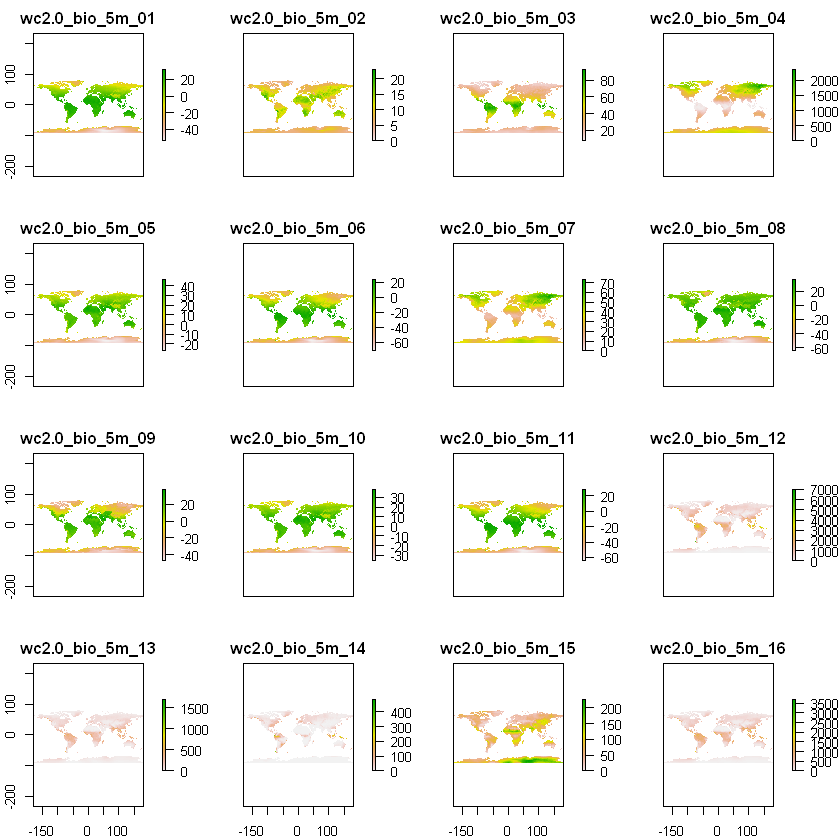

In [198]:
#Here needs to print nicely all of the environmental data:
plot(env)

In [199]:
clipped_env<-crop(env, extent(china), snap="in")
masked_env<-mask(clipped_env, china)

In [209]:
path2layers<-"data\\environmental\\clipped\\"
writeRaster(clipped_env,filename=paste(path2layers,names(clipped_env),sep=""),format="GTiff", overwrite=TRUE,bylayer=TRUE)

path2layers<-"data\\environmental\\china\\"
writeRaster(masked_env,filename=paste(path2layers,names(masked_env),sep=""),format="GTiff", overwrite=TRUE,bylayer=TRUE)

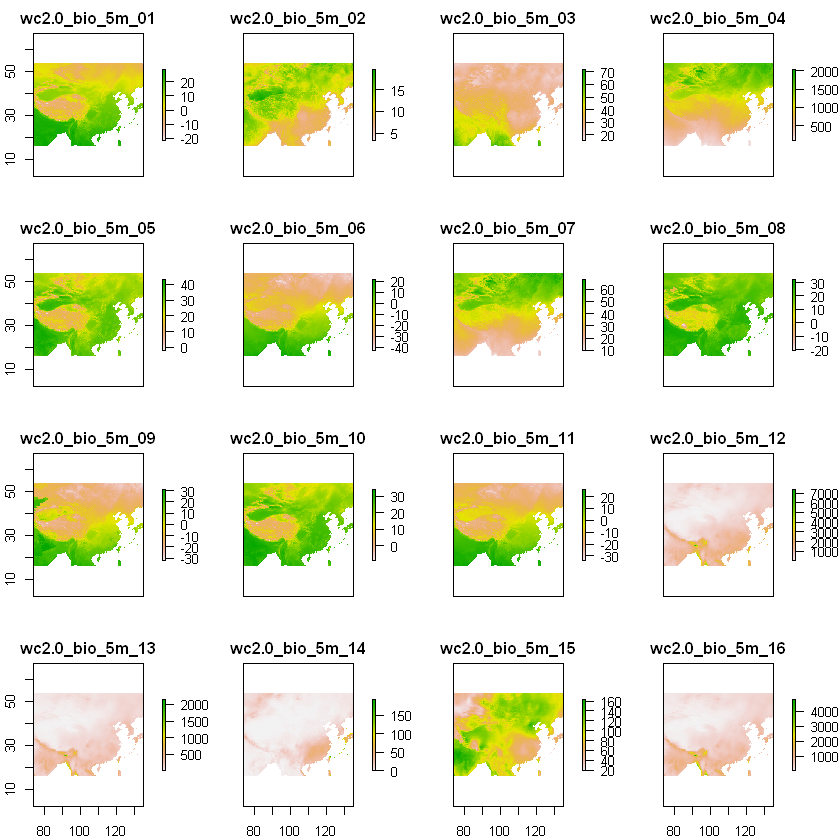

In [202]:
plot(clipped_env)

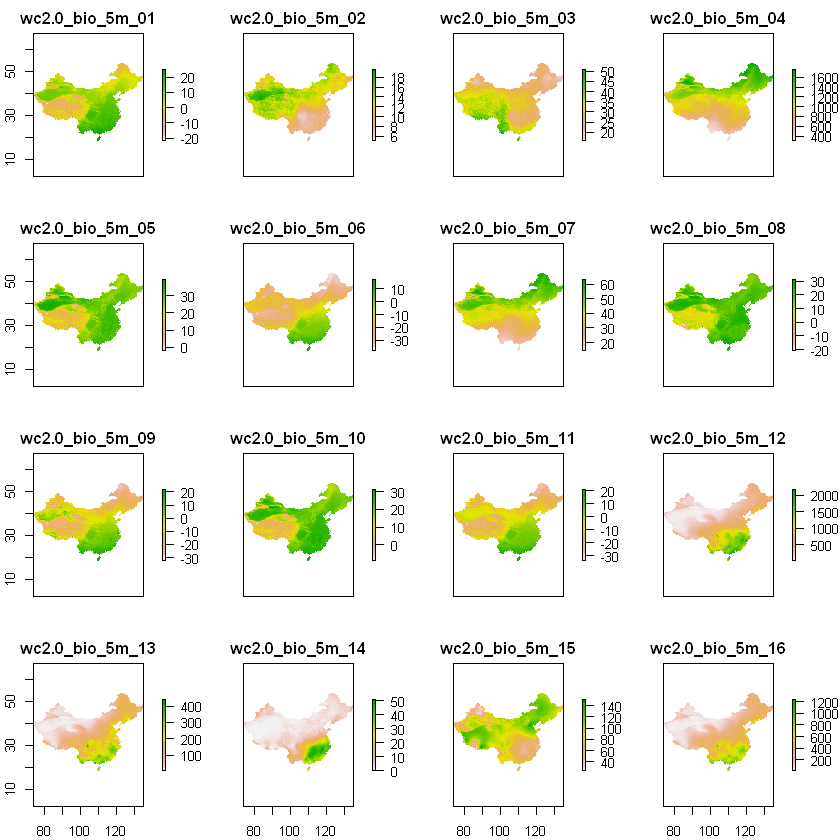

In [203]:
plot(masked_env)